<span style="color: #4169E1; font-family: Calibri; font-size: 40px; font-weight: bold;">
    ⚡ Importing Libraries ⚡
</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import warnings
# warnings.filterwarnings('ignore')

<span style="color: #4169E1; font-family: Calibri; font-size: 40px; font-weight: bold;">
    ⚡ Reading Data from file⚡
</span>

In [2]:
data = pd.read_csv(r'kidney_disease.csv')

In [3]:
data.shape  #identifying the number of row and columns in data

(400, 26)

In [4]:
data.head(10)  #showing the first 10 rows of data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


<span style="color: #4169E1; font-family: Calibri; font-size: 40px; font-weight: bold;">
    ⚡ Data Cleaning ⚡
</span>

In [5]:
data.info() #Showing data info to get dtypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
data.isna().sum()  #Checking number of nulls

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(0)

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ Age column ⚡
</span>

In [8]:
data['age'].unique() #checking the age column data validaty(nothing invalid)

array([48.,  7., 62., 51., 60., 68., 24., 52., 53., 50., 63., 40., 47.,
       61., 21., 42., 75., 69., nan, 73., 70., 65., 76., 72., 82., 46.,
       45., 35., 54., 11., 59., 67., 15., 55., 44., 26., 64., 56.,  5.,
       74., 38., 58., 71., 34., 17., 12., 43., 41., 57.,  8., 39., 66.,
       81., 14., 27., 83., 30.,  4.,  3.,  6., 32., 80., 49., 90., 78.,
       19.,  2., 33., 36., 37., 23., 25., 20., 29., 28., 22., 79.])

In [9]:
age_mean= round(data['age'].mean(),0)  #calculating the mean to replace the nulls with it 
age_mean

np.float64(51.0)

In [10]:
id_null_age_data=data[data['age'].isna()].index #getting the id of rows containing null age 
id_null_age_data

Index([30, 73, 112, 116, 117, 169, 191, 203, 268], dtype='int64')

In [11]:
data['age'] = data['age'].fillna(age_mean) #filling the age column nulls with mean
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [12]:
updated_rows= data.loc[data['id'].isin(id_null_age_data), ['id', 'age']] #Showing the updated null data 
updated_rows

,id,age
30,30,51.0
73,73,51.0
112,112,51.0
116,116,51.0
117,117,51.0
169,169,51.0
191,191,51.0
203,203,51.0
268,268,51.0


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ bp column (Blood pressure) ⚡
</span>

In [13]:
data['bp'].unique() #checking the bp column data validaty(nothing invalid)

array([ 80.,  50.,  70.,  90.,  nan, 100.,  60., 110., 140., 180., 120.])

In [14]:
data['bp'].value_counts() #Check  the value count of bp to estimate a solution for nulls{90 to 120 normal bp}

bp
80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: count, dtype: int64

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Filling the nulls of bp group with valid data
</span>

In [15]:
data[data['bp'].isna()] #Checking the nulls 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
75,75,5.0,NaN,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,no,yes,ckd
132,132,50.0,NaN,NaN,NaN,NaN,normal,NaN,notpresent,notpresent,...,24,13200,2.7,yes,no,no,good,yes,yes,ckd
138,138,73.0,NaN,1.010,1.0,0.0,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,\tno,no,good,no,no,ckd
161,161,62.0,NaN,1.015,3.0,0.0,abnormal,NaN,notpresent,notpresent,...,42,10200,4.8,yes,yes,no,good,no,no,ckd
164,164,14.0,NaN,1.015,0.0,0.0,NaN,NaN,notpresent,notpresent,...,40,9500,5.4,no,yes,no,poor,yes,no,ckd
185,185,4.0,NaN,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,34,\t?,NaN,no,no,no,good,no,no,ckd
187,187,3.0,NaN,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,34,12300,NaN,no,no,no,good,no,no,ckd
188,188,8.0,NaN,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,38,NaN,NaN,no,\tno,no,good,no,no,ckd
215,215,2.0,NaN,1.010,3.0,0.0,normal,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd


In [16]:
data[ data['bp'].isna() ].isna().sum( axis = 1 ) #Check the numer of null in rows 

7       3
75      6
132     5
138     7
161     7
164     3
185     3
187     5
188     8
215    10
293     1
316     3
dtype: int64

In [17]:
data[ data['bp'].isna() ].isna().sum( axis = 1 ) /26 *100  #Check if there is a row with high null value to drop it (above 35)

7      11.538462
75     23.076923
132    19.230769
138    26.923077
161    26.923077
164    11.538462
185    11.538462
187    19.230769
188    30.769231
215    38.461538
293     3.846154
316    11.538462
dtype: float64

In [18]:
data.drop( index = [215], inplace = True )  #droping row with index 215 as it has high null %

In [19]:
data[data['bp'].isna()]  #the new bp_null rows without 215

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
75,75,5.0,NaN,1.015,1.0,0.0,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,no,yes,ckd
132,132,50.0,NaN,NaN,NaN,NaN,normal,NaN,notpresent,notpresent,...,24,13200,2.7,yes,no,no,good,yes,yes,ckd
138,138,73.0,NaN,1.010,1.0,0.0,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,\tno,no,good,no,no,ckd
161,161,62.0,NaN,1.015,3.0,0.0,abnormal,NaN,notpresent,notpresent,...,42,10200,4.8,yes,yes,no,good,no,no,ckd
164,164,14.0,NaN,1.015,0.0,0.0,NaN,NaN,notpresent,notpresent,...,40,9500,5.4,no,yes,no,poor,yes,no,ckd
185,185,4.0,NaN,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,34,\t?,NaN,no,no,no,good,no,no,ckd
187,187,3.0,NaN,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,34,12300,NaN,no,no,no,good,no,no,ckd
188,188,8.0,NaN,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,38,NaN,NaN,no,\tno,no,good,no,no,ckd
293,293,50.0,NaN,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,48,4700,5.4,no,no,no,good,no,no,notckd


In [20]:
index_null_bp=data[data['bp'].isna()].index
index_null_bp

Index([7, 75, 132, 138, 161, 164, 185, 187, 188, 293, 316], dtype='int64')

In [21]:
age_group_adult_median = data[data['age'].between(18, 40)]['bp'].median()  #get the median of bp to the adult group
age_group_adult_median

np.float64(70.0)

In [22]:
age_group_older_adult_median = data[data['age'].between(41, 75)]['bp'].median()  #get the median of bp to the older adult group
age_group_older_adult_median

np.float64(80.0)

In [23]:
age_group_child_median = data[data['age'].between(1, 17)]['bp'].median()  #get the median of bp to the children group
age_group_child_median

np.float64(60.0)

In [24]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['bp'].isna()
mask_adult = data['age'].between(18, 40) & data['bp'].isna()
mask_older = data['age'].between(41, 75) & data['bp'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'bp'] = age_group_child_median
data.loc[mask_adult, 'bp'] = age_group_adult_median
data.loc[mask_older, 'bp'] = age_group_older_adult_median

In [25]:
updated_rows= data.loc[data['id'].isin(index_null_bp), ['id','age', 'bp']] #Showing the updated null data 
updated_rows

,id,age,bp
7,7,24.0,70.0
75,75,5.0,60.0
132,132,50.0,80.0
138,138,73.0,80.0
161,161,62.0,80.0
164,164,14.0,60.0
185,185,4.0,60.0
187,187,3.0,60.0
188,188,8.0,60.0
293,293,50.0,80.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              399 non-null    int64  
 1   age             399 non-null    float64
 2   bp              399 non-null    float64
 3   sg              352 non-null    float64
 4   al              353 non-null    float64
 5   su              350 non-null    float64
 6   rbc             247 non-null    object 
 7   pc              334 non-null    object 
 8   pcc             395 non-null    object 
 9   ba              395 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ sg column (Specific Gravity (SG) in Urinalysis) ⚡
</span>

In [27]:
data['sg'].unique() #Check the validity of data (nothing invalid)

array([1.02 , 1.01 , 1.005, 1.015,   nan, 1.025])

In [28]:
data[data['sg'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
13,13,68.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,yes,poor,yes,no,ckd
17,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
21,21,60.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,32,6200,3.6,yes,yes,yes,good,no,no,ckd
28,28,75.0,70.0,NaN,1.0,3.0,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
30,30,51.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
37,37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
50,50,53.0,60.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,11000,3.8,yes,yes,no,poor,yes,yes,ckd
57,57,76.0,90.0,NaN,NaN,NaN,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,yes,poor,no,no,ckd
59,59,59.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,yes,ckd
78,78,70.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,30,NaN,NaN,yes,no,no,good,yes,no,ckd


In [29]:
data[ data['sg'].isna() ].isna().sum( axis = 1 ) /26 *100  #Check if there is a row with high null value to drop it (above 35)

13     30.769231
17     30.769231
21     26.923077
28     34.615385
30     34.615385
37     19.230769
50     19.230769
57     30.769231
59     42.307692
78     26.923077
81     19.230769
82     34.615385
86     42.307692
98     19.230769
99      7.692308
104    42.307692
106    23.076923
109    38.461538
121    23.076923
122    34.615385
125    34.615385
132    15.384615
142    34.615385
148    42.307692
151    26.923077
160    19.230769
162    19.230769
166    34.615385
174    19.230769
188    26.923077
197    26.923077
201    26.923077
202    26.923077
203    30.769231
205    34.615385
208    26.923077
222    42.307692
228    42.307692
231    26.923077
236    26.923077
238    26.923077
245    19.230769
268    19.230769
280    19.230769
295    19.230769
322    19.230769
346    11.538462
dtype: float64

In [30]:
result = data[data['sg'].isna() & (data.isna().mean(axis=1) > 0.35)] #Showing the rows with high null %
result

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
59,59,59.0,100.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,yes,ckd
86,86,56.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
104,104,55.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,poor,yes,no,ckd
109,109,54.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
148,148,69.0,60.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
222,222,74.0,60.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
228,228,60.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,good,no,no,ckd


In [31]:
result_index= data[data['sg'].isna() & (data.isna().mean(axis=1) > 0.35)].index
result_index

Index([59, 86, 104, 109, 148, 222, 228], dtype='int64')

In [32]:
data.drop(index=result_index,inplace=True)

In [33]:
data[data['sg'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
13,13,68.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,yes,poor,yes,no,ckd
17,17,47.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
21,21,60.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,32,6200,3.6,yes,yes,yes,good,no,no,ckd
28,28,75.0,70.0,NaN,1.0,3.0,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
30,30,51.0,70.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
37,37,72.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
50,50,53.0,60.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,11000,3.8,yes,yes,no,poor,yes,yes,ckd
57,57,76.0,90.0,NaN,NaN,NaN,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,yes,poor,no,no,ckd
78,78,70.0,80.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,30,NaN,NaN,yes,no,no,good,yes,no,ckd
81,81,45.0,90.0,NaN,NaN,NaN,NaN,NaN,notpresent,notpresent,...,29,5500,3.7,yes,yes,no,good,no,no,ckd


In [34]:
index_null_sg=data[data['sg'].isna()].index
index_null_sg

Index([ 13,  17,  21,  28,  30,  37,  50,  57,  78,  81,  82,  98,  99, 106,
       121, 122, 125, 132, 142, 151, 160, 162, 166, 174, 188, 197, 201, 202,
       203, 205, 208, 231, 236, 238, 245, 268, 280, 295, 322, 346],
      dtype='int64')

In [35]:
age_group_adult_sg_median = data[data['age'].between(18, 40)]['sg'].median()  #get the median of sg to the adult group
age_group_adult_sg_median

np.float64(1.02)

In [36]:
age_group_older_adult_sg_median = data[data['age'].between(41, 60)]['sg'].median()  #get the median of sg to the older adult group
age_group_older_adult_sg_median

np.float64(1.02)

In [37]:
age_group_child_sg_median = data[data['age'].between(1, 17)]['sg'].median()  #get the median of sg to the children group
age_group_child_sg_median

np.float64(1.015)

In [38]:
age_group_elder_sg_median = data[data['age'].between(61, 100)]['sg'].median()  #get the median of sg to the elder group
age_group_elder_sg_median

np.float64(1.015)

In [39]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['sg'].isna()
mask_adult = data['age'].between(18, 40) & data['sg'].isna()
mask_older = data['age'].between(41, 60) & data['sg'].isna()
mask_elder = data['age'].between(61, 100) & data['sg'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'sg'] = age_group_child_sg_median
data.loc[mask_adult, 'sg'] = age_group_adult_sg_median
data.loc[mask_older, 'sg'] = age_group_older_adult_sg_median
data.loc[mask_elder, 'sg'] = age_group_elder_sg_median

In [40]:
updated_rows= data.loc[data['id'].isin(index_null_sg), ['id','age', 'sg']] #Showing the updated null data 
updated_rows

,id,age,sg
13,13,68.0,1.015
17,17,47.0,1.020
21,21,60.0,1.020
28,28,75.0,1.015
30,30,51.0,1.020
37,37,72.0,1.015
50,50,53.0,1.020
57,57,76.0,1.015
78,78,70.0,1.015
81,81,45.0,1.020


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              353 non-null    float64
 5   su              350 non-null    float64
 6   rbc             247 non-null    object 
 7   pc              334 non-null    object 
 8   pcc             388 non-null    object 
 9   ba              388 non-null    object 
 10  bgr             350 non-null    float64
 11  bu              374 non-null    float64
 12  sc              376 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ al column (Urinary Albumin) ⚡
</span>

In [42]:
data['al'].unique()

array([ 1.,  4.,  2.,  3.,  0., nan,  5.])

In [43]:
data['al'].value_counts()

al
0.0    199
1.0     44
2.0     43
3.0     42
4.0     24
5.0      1
Name: count, dtype: int64

In [44]:
data[data['al'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
13,13,68.0,70.0,1.015,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,yes,poor,yes,no,ckd
17,17,47.0,80.0,1.020,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
21,21,60.0,90.0,1.020,NaN,NaN,NaN,NaN,notpresent,notpresent,...,32,6200,3.6,yes,yes,yes,good,no,no,ckd
30,30,51.0,70.0,1.020,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
37,37,72.0,80.0,1.015,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
50,50,53.0,60.0,1.020,NaN,NaN,NaN,NaN,notpresent,notpresent,...,28,11000,3.8,yes,yes,no,poor,yes,yes,ckd
57,57,76.0,90.0,1.015,NaN,NaN,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,yes,poor,no,no,ckd
78,78,70.0,80.0,1.015,NaN,NaN,NaN,NaN,notpresent,notpresent,...,30,NaN,NaN,yes,no,no,good,yes,no,ckd
81,81,45.0,90.0,1.020,NaN,NaN,NaN,NaN,notpresent,notpresent,...,29,5500,3.7,yes,yes,no,good,no,no,ckd
82,82,38.0,70.0,1.020,NaN,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,yes,no,ckd


In [45]:
data[ data['al'].isna() ].isna().sum( axis = 1 ) /26 *100  #Check if there is a row with high null value to drop it (above 35)

13     26.923077
17     26.923077
21     23.076923
30     30.769231
37     15.384615
50     15.384615
57     26.923077
78     23.076923
81     15.384615
82     30.769231
98     15.384615
106    19.230769
122    30.769231
125    30.769231
132    11.538462
134    15.384615
136    23.076923
142    30.769231
151    23.076923
160    15.384615
162    15.384615
166    30.769231
174    15.384615
188    23.076923
197    23.076923
201    23.076923
202    23.076923
203    26.923077
205    30.769231
208    23.076923
231    23.076923
236    23.076923
238    23.076923
245    15.384615
268    15.384615
280    15.384615
295    15.384615
322    15.384615
346     7.692308
dtype: float64

In [46]:
result = data[data['al'].isna() & (data.isna().mean(axis=1) > 0.35)] #Showing the rows with high null %
result # None 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [47]:
index_null_al=data[data['al'].isna()].index
index_null_al

Index([ 13,  17,  21,  30,  37,  50,  57,  78,  81,  82,  98, 106, 122, 125,
       132, 134, 136, 142, 151, 160, 162, 166, 174, 188, 197, 201, 202, 203,
       205, 208, 231, 236, 238, 245, 268, 280, 295, 322, 346],
      dtype='int64')

In [48]:
age_group_adult_al_median = data[data['age'].between(18, 40)]['al'].median()  #get the median of al to the adult group
age_group_adult_al_median

np.float64(0.0)

In [49]:
age_group_older_adult_al_median = data[data['age'].between(41, 60)]['al'].median()  #get the median of al to the older adult group
age_group_older_adult_al_median

np.float64(0.0)

In [50]:
age_group_child_al_median = data[data['age'].between(1, 17)]['al'].median()  #get the median of al to the children group
age_group_child_al_median

np.float64(1.0)

In [51]:
age_group_elder_al_median = data[data['age'].between(61, 100)]['al'].median()  #get the median of al to the elder group
age_group_elder_al_median

np.float64(1.0)

In [52]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['al'].isna()
mask_adult = data['age'].between(18, 40) & data['al'].isna()
mask_older = data['age'].between(41, 60) & data['al'].isna()
mask_elder = data['age'].between(61, 100) & data['al'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'al'] = age_group_child_al_median
data.loc[mask_adult, 'al'] = age_group_adult_al_median
data.loc[mask_older, 'al'] = age_group_older_adult_al_median
data.loc[mask_elder, 'al'] = age_group_elder_al_median

In [53]:
updated_rows= data.loc[data['id'].isin(index_null_sg), ['id','age', 'al']] #Showing the updated null data 
updated_rows

,id,age,al
13,13,68.0,1.0
17,17,47.0,0.0
21,21,60.0,0.0
28,28,75.0,1.0
30,30,51.0,0.0
37,37,72.0,1.0
50,50,53.0,0.0
57,57,76.0,1.0
78,78,70.0,1.0
81,81,45.0,0.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              350 non-null    float64
 6   rbc             247 non-null    object 
 7   pc              334 non-null    object 
 8   pcc             388 non-null    object 
 9   ba              388 non-null    object 
 10  bgr             350 non-null    float64
 11  bu              374 non-null    float64
 12  sc              376 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ su column (Sugar in Urine) ⚡
</span>

In [55]:
data['su'].unique()

array([ 0.,  3.,  4.,  1., nan,  2.,  5.])

In [56]:
data['su'].value_counts()

su
0.0    289
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: count, dtype: int64

In [57]:
data[data['su'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
13,13,68.0,70.0,1.015,1.0,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,yes,poor,yes,no,ckd
17,17,47.0,80.0,1.020,0.0,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
21,21,60.0,90.0,1.020,0.0,NaN,NaN,NaN,notpresent,notpresent,...,32,6200,3.6,yes,yes,yes,good,no,no,ckd
30,30,51.0,70.0,1.020,0.0,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
37,37,72.0,80.0,1.015,1.0,NaN,NaN,NaN,notpresent,notpresent,...,28,6900,2.5,yes,yes,no,poor,no,yes,ckd\t
50,50,53.0,60.0,1.020,0.0,NaN,NaN,NaN,notpresent,notpresent,...,28,11000,3.8,yes,yes,no,poor,yes,yes,ckd
57,57,76.0,90.0,1.015,1.0,NaN,NaN,normal,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,yes,poor,no,no,ckd
78,78,70.0,80.0,1.015,1.0,NaN,NaN,NaN,notpresent,notpresent,...,30,NaN,NaN,yes,no,no,good,yes,no,ckd
81,81,45.0,90.0,1.020,0.0,NaN,NaN,NaN,notpresent,notpresent,...,29,5500,3.7,yes,yes,no,good,no,no,ckd
82,82,38.0,70.0,1.020,0.0,NaN,NaN,NaN,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,yes,no,ckd


In [58]:
data[ data['su'].isna() ].isna().sum( axis = 1 ) /26 *100  #Check if there is a row with high null value to drop it (above 35)

13     23.076923
17     23.076923
21     19.230769
30     26.923077
37     11.538462
50     11.538462
57     23.076923
78     19.230769
81     11.538462
82     26.923077
85     34.615385
98     11.538462
106    15.384615
121    19.230769
122    26.923077
125    26.923077
132     7.692308
134    11.538462
136    19.230769
142    26.923077
151    19.230769
160    11.538462
162    11.538462
166    26.923077
174    11.538462
188    19.230769
194    34.615385
197    19.230769
201    19.230769
202    19.230769
203    23.076923
205    26.923077
208    19.230769
231    19.230769
236    19.230769
238    19.230769
245    11.538462
268    11.538462
280    11.538462
295    11.538462
322    11.538462
346     3.846154
dtype: float64

In [59]:
result = data[data['su'].isna() & (data.isna().mean(axis=1) > 0.35)] #Showing the rows with high null %
result #None

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [60]:
index_null_su=data[data['su'].isna()].index
index_null_su

Index([ 13,  17,  21,  30,  37,  50,  57,  78,  81,  82,  85,  98, 106, 121,
       122, 125, 132, 134, 136, 142, 151, 160, 162, 166, 174, 188, 194, 197,
       201, 202, 203, 205, 208, 231, 236, 238, 245, 268, 280, 295, 322, 346],
      dtype='int64')

In [61]:
age_group_adult_su_median = data[data['age'].between(18, 40)]['su'].median()  #get the median of su to the adult group
age_group_adult_su_median

np.float64(0.0)

In [62]:
age_group_older_adult_su_median = data[data['age'].between(41, 60)]['su'].median()  #get the median of su to the older adult group
age_group_older_adult_su_median

np.float64(0.0)

In [63]:
age_group_child_su_median = data[data['age'].between(1, 17)]['su'].median()  #get the median of su to the children group
age_group_child_su_median

np.float64(0.0)

In [64]:
age_group_elder_su_median = data[data['age'].between(61, 100)]['su'].median()  #get the median of su to the elder group
age_group_elder_su_median

np.float64(0.0)

In [65]:
data['su'].fillna(value=data['su'].median(),inplace=True) #replacing it all with global median since age group doesnt affect it

C:\Users\User\AppData\Local\Temp\ipykernel_7384\366202853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['su'].fillna(value=data['su'].median(),inplace=True) #replacing it all with global median since age group doesnt affect it


In [66]:
updated_rows= data.loc[data['id'].isin(index_null_su), ['id','age', 'su']] #Showing the updated null data 
updated_rows

,id,age,su
13,13,68.0,0.0
17,17,47.0,0.0
21,21,60.0,0.0
30,30,51.0,0.0
37,37,72.0,0.0
50,50,53.0,0.0
57,57,76.0,0.0
78,78,70.0,0.0
81,81,45.0,0.0
82,82,38.0,0.0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             247 non-null    object 
 7   pc              334 non-null    object 
 8   pcc             388 non-null    object 
 9   ba              388 non-null    object 
 10  bgr             350 non-null    float64
 11  bu              374 non-null    float64
 12  sc              376 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ rbc column (Red Blood Cells) ⚡
</span>

In [68]:
data['rbc'].unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [69]:
data['rbc'].value_counts()

rbc
normal      200
abnormal     47
Name: count, dtype: int64

In [70]:
index_null_rbc=data[data['rbc'].isna()].index
index_null_rbc

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=145)

In [71]:
data['rbc'].fillna(value='unknown',inplace=True) #replaced nulls with unknown as changing the data could lead to misinformation 

C:\Users\User\AppData\Local\Temp\ipykernel_7384\523481158.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rbc'].fillna(value='unknown',inplace=True) #replaced nulls with unknown as changing the data could lead to misinformation


In [72]:
updated_rows= data.loc[data['id'].isin(index_null_rbc), ['id','rbc']] #Showing the updated null data 
updated_rows

,id,rbc
0,0,unknown
1,1,unknown
5,5,unknown
6,6,unknown
10,10,unknown
...,...,...
309,309,unknown
322,322,unknown
349,349,unknown
350,350,unknown


In [73]:
data['rbc'].unique()

array(['unknown', 'normal', 'abnormal'], dtype=object)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              334 non-null    object 
 8   pcc             388 non-null    object 
 9   ba              388 non-null    object 
 10  bgr             350 non-null    float64
 11  bu              374 non-null    float64
 12  sc              376 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ pc column (Pus Cells(white blood cells) in Urine) ⚡
</span>

In [75]:
data['pc'].unique()

array(['normal', 'abnormal', nan], dtype=object)

In [76]:
data['pc'].value_counts()

pc
normal      259
abnormal     75
Name: count, dtype: int64

In [77]:
index_null_pc=data[data['pc'].isna()].index
index_null_pc

Index([  5,  13,  17,  21,  28,  30,  34,  37,  39,  43,  50,  53,  54,  78,
        81,  82,  85,  98, 106, 107, 117, 121, 122, 125, 132, 134, 138, 142,
       151, 160, 161, 162, 164, 165, 166, 172, 174, 188, 197, 201, 202, 203,
       205, 208, 221, 231, 236, 238, 245, 268, 280, 290, 295, 309, 322, 349,
       350, 381],
      dtype='int64')

In [78]:
data['pc'].fillna(value='unknown',inplace=True) #replaced nulls with unknown as changing the data could lead to misinformation 

C:\Users\User\AppData\Local\Temp\ipykernel_7384\3027280634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['pc'].fillna(value='unknown',inplace=True) #replaced nulls with unknown as changing the data could lead to misinformation


In [79]:
updated_rows= data.loc[data['id'].isin(index_null_pc), ['id','pc']] #Showing the updated null data 
updated_rows

,id,pc
5,5,unknown
13,13,unknown
17,17,unknown
21,21,unknown
28,28,unknown
30,30,unknown
34,34,unknown
37,37,unknown
39,39,unknown
43,43,unknown


In [80]:
data['pc'].unique()

array(['normal', 'abnormal', 'unknown'], dtype=object)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             388 non-null    object 
 9   ba              388 non-null    object 
 10  bgr             350 non-null    float64
 11  bu              374 non-null    float64
 12  sc              376 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ pcc column (Pus Cells Clusters) ⚡
</span>

In [82]:
data['pcc'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [83]:
data['pcc'].value_counts()

pcc
notpresent    346
present        42
Name: count, dtype: int64

In [84]:
index_null_pcc=data[data['pcc'].isna()].index
index_null_pcc

Index([290, 300, 316, 328], dtype='int64')

In [85]:
data['pcc'].fillna(value='notpresent',inplace=True) #small data that is missing replaced it with the highest value count(not present) 

C:\Users\User\AppData\Local\Temp\ipykernel_7384\3990472749.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['pcc'].fillna(value='notpresent',inplace=True) #small data that is missing replaced it with the highest value count(not present)


In [86]:
updated_rows= data.loc[data['id'].isin(index_null_pcc), ['id','pcc']] #Showing the updated null data 
updated_rows

,id,pcc
290,290,notpresent
300,300,notpresent
316,316,notpresent
328,328,notpresent


In [87]:
data['pcc'].unique()

array(['notpresent', 'present'], dtype=object)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              388 non-null    object 
 10  bgr             350 non-null    float64
 11  bu              374 non-null    float64
 12  sc              376 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ ba column (Bacteria in Urine) ⚡
</span>

In [89]:
data['ba'].unique()

array(['notpresent', 'present', nan], dtype=object)

In [90]:
data['ba'].value_counts()

ba
notpresent    366
present        22
Name: count, dtype: int64

In [91]:
index_null_ba=data[data['ba'].isna()].index
index_null_ba

Index([290, 300, 316, 328], dtype='int64')

In [92]:
data['ba'].fillna(value='notpresent',inplace=True) #small data that is missing replaced it with the highest value count(not present) 

C:\Users\User\AppData\Local\Temp\ipykernel_7384\666763488.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ba'].fillna(value='notpresent',inplace=True) #small data that is missing replaced it with the highest value count(not present)


In [93]:
updated_rows= data.loc[data['id'].isin(index_null_ba), ['id','ba']] #Showing the updated null data 
updated_rows

,id,ba
290,290,notpresent
300,300,notpresent
316,316,notpresent
328,328,notpresent


In [94]:
data['ba'].unique()

array(['notpresent', 'present'], dtype=object)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              392 non-null    object 
 10  bgr             350 non-null    float64
 11  bu              374 non-null    float64
 12  sc              376 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ bgr column ( Blood Glucose Random (not fasting)) ⚡
</span>

In [96]:
data['bgr'].unique()

array([121.,  nan, 423., 117., 106.,  74., 100., 410., 138.,  70., 490.,
       380., 208.,  98., 157.,  76.,  99., 114., 263., 173.,  95., 108.,
       156., 264., 123.,  93., 107., 159., 140., 171., 270.,  92., 137.,
       204.,  79., 207., 124., 144.,  91., 162., 246., 253., 141., 182.,
        86., 150., 146., 425., 112., 250., 360., 163., 129., 133., 102.,
       158., 165., 132., 104., 127., 169., 251., 109., 280., 210., 219.,
       295.,  94., 172., 101., 298., 153.,  88., 226., 115.,  89., 297.,
       294., 323., 125.,  90., 308., 118., 224., 128., 122., 214., 213.,
       268., 256.,  84., 105., 288., 139.,  78., 273., 242., 424., 303.,
       148., 160., 192., 307., 220., 447., 309.,  22., 111., 261., 215.,
       234., 131., 352.,  80., 239., 110., 130., 184., 252., 113., 230.,
       341., 255., 103., 238., 248., 120., 241., 269., 201., 203., 463.,
       176.,  82., 119.,  97.,  96.,  81., 116., 134.,  85.,  83.,  87.,
        75.])

In [97]:
data['bgr'].value_counts()

bgr
99.0     10
93.0      9
100.0     9
107.0     8
92.0      6
         ..
463.0     1
269.0     1
116.0     1
134.0     1
87.0      1
Name: count, Length: 143, dtype: int64

In [98]:
title_font_dict = { "family" : 'Times New Roman',
                    "size" : 25,
                    "color" : 'Blue'}

In [99]:
ax = px.box( data_frame = data,
        x = 'bgr',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in bgr column',
        "font" : title_font_dict
    } 
)

In [100]:
index_null_bgr=data[data['bgr'].isna()].index
index_null_bgr

Index([  1,  21,  23,  24,  29,  38,  41,  47,  52,  54,  55,  56,  65,  72,
        75,  85, 112, 113, 114, 115, 122, 123, 131, 139, 141, 145, 161, 165,
       186, 187, 193, 194, 197, 209, 232, 234, 276, 283, 312, 315, 332, 378],
      dtype='int64')

In [101]:
age_group_adult_bgr_median = data[data['age'].between(18, 40)]['bgr'].median()  #get the median of bgr to the adult group
age_group_adult_bgr_median

np.float64(104.0)

In [102]:
age_group_older_adult_bgr_median = data[data['age'].between(41, 60)]['bgr'].median()  #get the median of bgr to the older adult group
age_group_older_adult_bgr_median

np.float64(124.0)

In [103]:
age_group_child_bgr_median = data[data['age'].between(1, 17)]['bgr'].median()  #get the median of bgr to the children group
age_group_child_bgr_median

np.float64(93.0)

In [104]:
age_group_elder_bgr_median = data[data['age'].between(61, 100)]['bgr'].median()  #get the median of bgr to the elder group
age_group_elder_bgr_median

np.float64(132.0)

In [105]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['bgr'].isna()
mask_adult = data['age'].between(18, 40) & data['bgr'].isna()
mask_older = data['age'].between(41, 60) & data['bgr'].isna()
mask_elder = data['age'].between(61, 100) & data['bgr'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'bgr'] = age_group_child_bgr_median
data.loc[mask_adult, 'bgr'] = age_group_adult_bgr_median
data.loc[mask_older, 'bgr'] = age_group_older_adult_bgr_median
data.loc[mask_elder, 'bgr'] = age_group_elder_bgr_median

In [106]:
updated_rows= data.loc[data['id'].isin(index_null_bgr), ['id','age', 'bgr']] #Showing the updated null data 
updated_rows

,id,age,bgr
1,1,7.0,93.0
21,21,60.0,124.0
23,23,21.0,104.0
24,24,42.0,124.0
29,29,68.0,132.0
38,38,69.0,132.0
41,41,45.0,124.0
47,47,11.0,93.0
52,52,53.0,124.0
54,54,63.0,132.0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              392 non-null    object 
 10  bgr             392 non-null    float64
 11  bu              374 non-null    float64
 12  sc              376 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ bu column ( Blood in Urine) ⚡
</span>

In [108]:
data['bu'].unique()

array([ 36. ,  18. ,  53. ,  56. ,  26. ,  25. ,  54. ,  31. ,  60. ,
       107. ,  55. ,  72. ,  86. ,  90. , 162. ,  46. ,  87. ,  27. ,
       148. , 180. , 163. ,   nan,  50. ,  75. ,  45. ,  28. , 155. ,
        33. ,  39. , 153. ,  29. ,  65. , 103. ,  70. ,  80. ,  20. ,
       202. ,  77. ,  89. ,  24. ,  17. ,  32. , 114. ,  66. ,  38. ,
       164. , 142. , 391. ,  15. , 111. ,  73. ,  19. ,  92. ,  35. ,
        16. , 139. ,  48. ,  85. ,  98. , 186. ,  47. ,  52. ,  82. ,
        51. , 106. ,  22. , 217. , 118. ,  71. ,  34. ,  40. ,  21. ,
       219. ,  30. , 125. , 166. ,  49. , 208. , 176. ,  68. , 145. ,
       165. , 322. ,  23. , 235. , 132. ,  76. ,  42. ,  44. ,  41. ,
       113. ,   1.5, 146. ,  58. , 133. , 137. ,  67. , 115. , 223. ,
        98.6, 158. ,  37. ,  94. ,  74. ,  96. , 150. ,  61. ,  57. ,
        95. , 191. ,  93. , 241. ,  64. ,  79. , 215. , 309. ,  10. ])

In [109]:
data['bu'].value_counts()

bu
46.0     15
25.0     13
19.0     11
40.0     10
50.0      9
         ..
93.0      1
64.0      1
79.0      1
215.0     1
309.0     1
Name: count, Length: 116, dtype: int64

In [110]:
ax = px.box( data_frame = data,
        x = 'bu',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in bu column',
        "font" : title_font_dict
    } 
)

In [111]:
data[data['bu'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
23,23,21.0,70.0,1.010,0.0,0.0,unknown,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,poor,no,yes,ckd
54,54,63.0,80.0,1.010,2.0,2.0,normal,unknown,notpresent,notpresent,...,40,9800,4.2,yes,no,yes,good,no,no,ckd
55,55,35.0,80.0,1.005,3.0,0.0,abnormal,normal,notpresent,notpresent,...,28,NaN,NaN,no,no,no,good,yes,no,ckd
64,64,55.0,80.0,1.010,0.0,0.0,unknown,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,\tno,good,no,no,ckd
67,67,45.0,80.0,1.020,3.0,0.0,normal,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,poor,no,no,ckd
113,113,61.0,90.0,1.015,0.0,2.0,unknown,normal,notpresent,notpresent,...,NaN,9800,NaN,no,yes,no,poor,no,yes,ckd
134,134,47.0,100.0,1.010,0.0,0.0,normal,unknown,notpresent,notpresent,...,33,10200,3.8,no,yes,no,good,no,no,ckd
161,161,62.0,80.0,1.015,3.0,0.0,abnormal,unknown,notpresent,notpresent,...,42,10200,4.8,yes,yes,no,good,no,no,ckd
165,165,60.0,80.0,1.020,0.0,2.0,unknown,unknown,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
209,209,19.0,70.0,1.020,0.0,0.0,unknown,normal,notpresent,notpresent,...,NaN,6900,NaN,no,no,no,good,no,no,ckd


In [112]:
index_null_bu=data[data['bu'].isna()].index
index_null_bu

Index([ 23,  54,  55,  64,  67, 113, 134, 161, 165, 209, 220, 232, 276, 283,
       312, 315, 334, 378],
      dtype='int64')

In [113]:
age_group_adult_bu_median = data[data['age'].between(18, 40)]['bu'].median()  #get the median of bgr to the adult group
age_group_adult_bu_median

np.float64(34.5)

In [114]:
age_group_older_adult_bu_median = data[data['age'].between(41, 60)]['bu'].median()  #get the median of bgr to the older adult group
age_group_older_adult_bu_median

np.float64(44.0)

In [115]:
age_group_child_bu_median = data[data['age'].between(1, 17)]['bu'].median()  #get the median of bgr to the children group
age_group_child_bu_median

np.float64(24.0)

In [116]:
age_group_elder_bu_median = data[data['age'].between(61, 100)]['bu'].median()  #get the median of bgr to the elder group
age_group_elder_bu_median

np.float64(48.0)

In [117]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['bu'].isna()
mask_adult = data['age'].between(18, 40) & data['bu'].isna()
mask_older = data['age'].between(41, 60) & data['bu'].isna()
mask_elder = data['age'].between(61, 100) & data['bu'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'bu'] = age_group_child_bu_median
data.loc[mask_adult, 'bu'] = age_group_adult_bu_median
data.loc[mask_older, 'bu'] = age_group_older_adult_bu_median
data.loc[mask_elder, 'bu'] = age_group_elder_bu_median

In [118]:
updated_rows= data.loc[data['id'].isin(index_null_bu), ['id','age', 'bu']] #Showing the updated null data 
updated_rows

,id,age,bu
23,23,21.0,34.5
54,54,63.0,48.0
55,55,35.0,34.5
64,64,55.0,44.0
67,67,45.0,44.0
113,113,61.0,48.0
134,134,47.0,44.0
161,161,62.0,48.0
165,165,60.0,44.0
209,209,19.0,34.5


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              392 non-null    object 
 10  bgr             392 non-null    float64
 11  bu              392 non-null    float64
 12  sc              376 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ sc column ( Serum Creatinine(Wastes in kidney)) ⚡
</span>

In [120]:
data['sc'].unique()

array([ 1.2 ,  0.8 ,  1.8 ,  3.8 ,  1.4 ,  1.1 , 24.  ,  1.9 ,  7.2 ,
        4.  ,  2.7 ,  2.1 ,  4.6 ,  4.1 ,  9.6 ,  2.2 ,  5.2 ,  1.3 ,
        1.6 ,  3.9 , 76.  ,  7.7 ,   nan,  2.4 ,  7.3 ,  1.5 ,  2.5 ,
        2.  ,  3.4 ,  0.7 ,  1.  , 10.8 ,  6.3 ,  5.9 ,  0.9 ,  3.  ,
        3.25,  9.7 ,  3.2 , 32.  ,  0.6 ,  6.1 ,  3.3 ,  6.7 ,  8.5 ,
        2.8 , 15.  ,  2.9 ,  1.7 ,  3.6 ,  5.6 ,  6.5 ,  4.4 , 10.2 ,
       11.5 ,  0.5 , 12.2 ,  5.3 ,  9.2 , 13.8 , 16.9 ,  6.  ,  7.1 ,
       18.  ,  2.3 , 13.  , 14.2 , 16.4 ,  2.6 ,  7.5 ,  4.3 , 18.1 ,
       11.8 ,  9.3 ,  6.8 , 13.5 , 12.8 , 11.9 , 12.  , 13.4 , 15.2 ,
       13.3 ,  0.4 ])

In [121]:
data['sc'].value_counts()

sc
1.2     40
1.1     24
0.5     23
1.0     23
0.7     22
        ..
12.0     1
13.4     1
15.2     1
13.3     1
0.4      1
Name: count, Length: 82, dtype: int64

In [122]:
ax = px.box( data_frame = data,
        x = 'sc',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in bu column',
        "font" : title_font_dict
    } 
)

In [123]:
data[data['sc'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
23,23,21.0,70.0,1.010,0.0,0.0,unknown,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,poor,no,yes,ckd
55,55,35.0,80.0,1.005,3.0,0.0,abnormal,normal,notpresent,notpresent,...,28,NaN,NaN,no,no,no,good,yes,no,ckd
64,64,55.0,80.0,1.010,0.0,0.0,unknown,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,\tno,good,no,no,ckd
67,67,45.0,80.0,1.020,3.0,0.0,normal,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,poor,no,no,ckd
113,113,61.0,90.0,1.015,0.0,2.0,unknown,normal,notpresent,notpresent,...,NaN,9800,NaN,no,yes,no,poor,no,yes,ckd
161,161,62.0,80.0,1.015,3.0,0.0,abnormal,unknown,notpresent,notpresent,...,42,10200,4.8,yes,yes,no,good,no,no,ckd
165,165,60.0,80.0,1.020,0.0,2.0,unknown,unknown,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
209,209,19.0,70.0,1.020,0.0,0.0,unknown,normal,notpresent,notpresent,...,NaN,6900,NaN,no,no,no,good,no,no,ckd
216,216,64.0,70.0,1.010,0.0,0.0,unknown,normal,notpresent,notpresent,...,38,NaN,NaN,no,no,no,good,no,no,ckd
220,220,36.0,80.0,1.010,0.0,0.0,unknown,normal,notpresent,notpresent,...,36,8800,NaN,no,no,no,good,no,no,ckd


In [124]:
index_null_sc=data[data['sc'].isna()].index
index_null_sc

Index([23, 55, 64, 67, 113, 161, 165, 209, 216, 220, 232, 276, 283, 312, 315,
       334],
      dtype='int64')

In [125]:
age_group_adult_sc_median = data[data['age'].between(18, 40)]['sc'].median()  #get the median of sc to the adult group
age_group_adult_sc_median

np.float64(1.0)

In [126]:
age_group_older_adult_sc_median = data[data['age'].between(41, 60)]['sc'].median()  #get the median of sc to the older adult group
age_group_older_adult_sc_median

np.float64(1.2)

In [127]:
age_group_child_sc_median = data[data['age'].between(1, 17)]['sc'].median()  #get the median of sc to the children group
age_group_child_sc_median

np.float64(0.8500000000000001)

In [128]:
age_group_elder_sc_median = data[data['age'].between(61, 100)]['sc'].median()  #get the median of sc to the elder group
age_group_elder_sc_median

np.float64(1.9)

In [129]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['sc'].isna()
mask_adult = data['age'].between(18, 40) & data['sc'].isna()
mask_older = data['age'].between(41, 60) & data['sc'].isna()
mask_elder = data['age'].between(61, 100) & data['sc'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'sc'] = age_group_child_sc_median
data.loc[mask_adult, 'sc'] = age_group_adult_sc_median
data.loc[mask_older, 'sc'] = age_group_older_adult_sc_median
data.loc[mask_elder, 'sc'] = age_group_elder_sc_median

In [130]:
updated_rows= data.loc[data['id'].isin(index_null_sc), ['id','age', 'sc']] #Showing the updated null data 
updated_rows

,id,age,sc
23,23,21.0,1.0
55,55,35.0,1.0
64,64,55.0,1.2
67,67,45.0,1.2
113,113,61.0,1.9
161,161,62.0,1.9
165,165,60.0,1.2
209,209,19.0,1.0
216,216,64.0,1.9
220,220,36.0,1.0


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              392 non-null    object 
 10  bgr             392 non-null    float64
 11  bu              392 non-null    float64
 12  sc              392 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ sod column ( Sodium) ⚡
</span>

In [132]:
data['sod'].unique()

array([  nan, 111. , 142. , 104. , 114. , 131. , 138. , 135. , 130. ,
       141. , 139. ,   4.5, 136. , 129. , 140. , 132. , 133. , 134. ,
       125. , 163. , 137. , 128. , 143. , 127. , 146. , 126. , 122. ,
       147. , 124. , 115. , 145. , 113. , 120. , 150. , 144. ])

In [133]:
data['sod'].value_counts()

sod
135.0    40
140.0    25
141.0    22
139.0    21
138.0    20
142.0    20
137.0    19
150.0    17
136.0    17
147.0    13
145.0    11
132.0    10
146.0    10
144.0     9
131.0     9
133.0     8
130.0     7
134.0     6
143.0     4
124.0     3
127.0     3
113.0     2
114.0     2
120.0     2
128.0     2
125.0     2
122.0     2
111.0     1
104.0     1
129.0     1
4.5       1
163.0     1
126.0     1
115.0     1
Name: count, dtype: int64

In [134]:
ax = px.box( data_frame = data,
        x = 'sod',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in sod column',
        "font" : title_font_dict
    } 
)

In [135]:
data[data['sod'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,unknown,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,unknown,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
7,7,24.0,70.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,60.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,43,10800,5.7,no,no,no,good,no,no,notckd
303,303,55.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,50,6700,6.1,no,no,no,good,no,no,notckd
315,315,44.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,48,7800,4.4,no,no,no,good,no,no,notckd
336,336,25.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,40,9200,5.2,no,no,no,good,no,no,notckd


In [136]:
index_null_sod=data[data['sod'].isna()].index
index_null_sod

Index([  0,   1,   2,   4,   7,   8,  10,  19,  23,  28,  29,  33,  34,  35,
        40,  41,  47,  49,  52,  53,  55,  64,  65,  67,  68,  69,  72,  79,
        85,  87,  88,  96, 103, 112, 113, 114, 115, 116, 118, 119, 123, 124,
       131, 149, 150, 155, 156, 161, 165, 167, 168, 169, 177, 179, 180, 187,
       192, 194, 205, 207, 208, 209, 211, 214, 216, 218, 219, 220, 227, 232,
       234, 235, 237, 240, 283, 303, 315, 336, 363],
      dtype='int64')

In [137]:
result = data[data['sod'].isna() & (data.isna().mean(axis=1) > 0.35)] #Showing the rows with high null %
result

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [138]:
age_group_adult_sod_median = data[data['age'].between(18, 40)]['sod'].median()  #get the median of sc to the adult group
age_group_adult_sod_median

np.float64(140.5)

In [139]:
age_group_older_adult_sod_median = data[data['age'].between(41, 60)]['sod'].median()  #get the median of sc to the older adult group
age_group_older_adult_sod_median

np.float64(139.0)

In [140]:
age_group_child_sod_median = data[data['age'].between(1, 17)]['sod'].median()  #get the median of sc to the children group
age_group_child_sod_median

np.float64(137.5)

In [141]:
age_group_elder_sod_median = data[data['age'].between(61, 100)]['sod'].median()  #get the median of sc to the elder group
age_group_elder_sod_median

np.float64(137.5)

In [142]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['sod'].isna()
mask_adult = data['age'].between(18, 40) & data['sod'].isna()
mask_older = data['age'].between(41, 60) & data['sod'].isna()
mask_elder = data['age'].between(61, 100) & data['sod'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'sod'] = age_group_child_sod_median
data.loc[mask_adult, 'sod'] = age_group_adult_sod_median
data.loc[mask_older, 'sod'] = age_group_older_adult_sod_median
data.loc[mask_elder, 'sod'] = age_group_elder_sod_median

In [143]:
updated_rows= data.loc[data['id'].isin(index_null_sod), ['id','age', 'sod']] #Showing the updated null data 
updated_rows

,id,age,sod
0,0,48.0,139.0
1,1,7.0,137.5
2,2,62.0,137.5
4,4,51.0,139.0
7,7,24.0,140.5
...,...,...,...
283,283,60.0,139.0
303,303,55.0,139.0
315,315,44.0,139.0
336,336,25.0,140.5


In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              392 non-null    object 
 10  bgr             392 non-null    float64
 11  bu              392 non-null    float64
 12  sc              392 non-null    float64
 13  sod             392 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ pot column ( Potassium) ⚡
</span>

In [145]:
data['pot'].unique()

array([ nan,  2.5,  3.2,  4. ,  3.7,  4.2,  5.8,  3.4,  6.4,  4.9,  4.1,
        4.3,  5.2,  3.8,  4.6,  3.9,  4.7,  5.9,  4.8,  4.4,  6.6, 39. ,
        5.5,  5. ,  3.5,  3.6,  7.6,  2.9,  4.5,  5.7,  5.4,  5.3, 47. ,
        6.3,  5.1,  5.6,  3. ,  2.8,  2.7,  6.5,  3.3])

In [146]:
data['pot'].value_counts()

pot
5.0     30
3.5     30
4.9     27
4.7     17
4.8     16
4.0     14
3.9     14
4.2     14
4.4     14
4.1     14
3.8     14
4.5     13
4.3     12
3.7     12
3.6      8
4.6      7
3.4      5
5.2      5
5.7      4
5.3      4
5.4      3
2.9      3
3.3      3
3.2      3
6.3      3
5.5      3
2.5      2
5.8      2
3.0      2
6.5      2
5.9      2
5.6      2
6.4      1
6.6      1
39.0     1
7.6      1
47.0     1
5.1      1
2.7      1
2.8      1
Name: count, dtype: int64

In [147]:
ax = px.box( data_frame = data,
        x = 'pot',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in pot column',
        "font" : title_font_dict
    } 
)

In [148]:
data[data['pot'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,unknown,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,unknown,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
7,7,24.0,70.0,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,60.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,43,10800,5.7,no,no,no,good,no,no,notckd
303,303,55.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,50,6700,6.1,no,no,no,good,no,no,notckd
315,315,44.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,48,7800,4.4,no,no,no,good,no,no,notckd
336,336,25.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,40,9200,5.2,no,no,no,good,no,no,notckd


In [149]:
index_null_pot=data[data['pot'].isna()].index
index_null_pot

Index([  0,   1,   2,   4,   7,   8,  10,  19,  21,  23,  28,  29,  33,  34,
        35,  40,  41,  47,  49,  52,  53,  55,  64,  65,  67,  68,  69,  72,
        79,  85,  87,  88,  96, 103, 112, 113, 114, 115, 116, 118, 119, 123,
       124, 131, 149, 150, 155, 156, 161, 165, 167, 168, 169, 177, 179, 180,
       187, 192, 194, 205, 207, 208, 209, 211, 214, 216, 218, 219, 220, 227,
       232, 234, 235, 237, 240, 283, 303, 315, 336, 363],
      dtype='int64')

In [150]:
result = data[data['pot'].isna() & (data.isna().mean(axis=1) > 0.35)] #Showing the rows with high null %
result

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [151]:
age_group_adult_pot_median = data[data['age'].between(18, 40)]['pot'].median()  #get the median of sc to the adult group
age_group_adult_pot_median

np.float64(4.3)

In [152]:
age_group_older_adult_pot_median = data[data['age'].between(41, 60)]['pot'].median()  #get the median of sc to the older adult group
age_group_older_adult_pot_median

np.float64(4.4)

In [153]:
age_group_child_pot_median = data[data['age'].between(1, 17)]['pot'].median()  #get the median of sc to the children group
age_group_child_pot_median

np.float64(4.1)

In [154]:
age_group_elder_pot_median = data[data['age'].between(61, 100)]['pot'].median()  #get the median of sc to the elder group
age_group_elder_pot_median

np.float64(4.4)

In [155]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['pot'].isna()
mask_adult = data['age'].between(18, 40) & data['pot'].isna()
mask_older = data['age'].between(41, 60) & data['pot'].isna()
mask_elder = data['age'].between(61, 100) & data['pot'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'pot'] = age_group_child_pot_median
data.loc[mask_adult, 'pot'] = age_group_adult_pot_median
data.loc[mask_older, 'pot'] = age_group_older_adult_pot_median
data.loc[mask_elder, 'pot'] = age_group_elder_pot_median

In [156]:
updated_rows= data.loc[data['id'].isin(index_null_pot), ['id','age', 'pot']] #Showing the updated null data 
updated_rows

,id,age,pot
0,0,48.0,4.4
1,1,7.0,4.1
2,2,62.0,4.4
4,4,51.0,4.4
7,7,24.0,4.3
...,...,...,...
283,283,60.0,4.4
303,303,55.0,4.4
315,315,44.0,4.4
336,336,25.0,4.3


In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              392 non-null    object 
 10  bgr             392 non-null    float64
 11  bu              392 non-null    float64
 12  sc              392 non-null    float64
 13  sod             392 non-null    float64
 14  pot             392 non-null    float64
 15  hemo            346 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #F00B0BFF; font-family: Calibri; font-size: 30px; font-weight: bold;">
    🩸 hemo column ( Hemoglobin in blood) 🩸
</span>

In [158]:
data['hemo'].unique()

array([15.4, 11.3,  9.6, 11.2, 11.6, 12.2, 12.4, 10.8,  9.5,  9.4,  9.7,
        9.8,  5.6,  7.6, 12.6, 12.1, 12.7, 10.3,  7.7, 10.9,  nan, 11.1,
        9.9, 12.5, 12.9, 10.1, 12. , 13. ,  7.9,  9.3, 15. , 10. ,  8.6,
       13.6, 10.2, 10.5, 11. ,  7.5, 15.6, 15.2,  4.8,  9.1,  8.1, 11.9,
       13.5,  8.3,  7.1, 16.1, 10.4,  9.2,  6.2, 13.9, 14.1,  6. , 11.8,
       11.7, 11.4, 14. ,  8.2, 13.2,  6.1,  8. , 12.3,  8.4, 14.3,  9. ,
        8.7, 10.6, 13.1, 10.7,  5.5,  5.8,  6.8,  8.8,  8.5, 13.8, 11.5,
        7.3, 13.7, 12.8, 13.4,  6.3,  3.1, 17. , 15.9, 14.5, 15.5, 16.2,
       14.4, 14.2, 16.3, 14.8, 16.5, 15.7, 13.3, 14.6, 16.4, 16.9, 16. ,
       14.7, 16.6, 14.9, 16.7, 16.8, 15.8, 15.1, 17.1, 17.2, 15.3, 17.3,
       17.4, 17.7, 17.8, 17.5, 17.6])

In [159]:
data['hemo'].value_counts()

hemo
15.0    16
10.9     8
11.1     7
13.0     7
9.8      7
        ..
11.7     1
17.3     1
17.7     1
17.5     1
17.6     1
Name: count, Length: 114, dtype: int64

In [160]:
ax = px.box( data_frame = data,
        x = 'hemo',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in hemo column',
        "font" : title_font_dict
    } 
)

In [161]:
data[data['hemo'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
23,23,21.0,70.0,1.010,0.0,0.0,unknown,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,poor,no,yes,ckd
28,28,75.0,70.0,1.015,1.0,3.0,unknown,unknown,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
30,30,51.0,70.0,1.020,0.0,0.0,unknown,unknown,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,no,good,no,no,ckd
34,34,70.0,70.0,1.010,1.0,0.0,normal,unknown,present,present,...,NaN,NaN,NaN,no,yes,no,poor,no,no,ckd
41,41,45.0,70.0,1.010,0.0,0.0,unknown,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
57,57,76.0,90.0,1.015,1.0,0.0,unknown,normal,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,yes,poor,no,no,ckd
60,60,67.0,90.0,1.020,1.0,0.0,unknown,abnormal,present,notpresent,...,NaN,NaN,NaN,yes,no,no,good,no,no,ckd
61,61,67.0,80.0,1.010,1.0,3.0,normal,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,yes,no,ckd
66,66,67.0,70.0,1.020,2.0,0.0,abnormal,normal,notpresent,notpresent,...,\t?,NaN,NaN,yes,yes,no,good,yes,no,ckd
67,67,45.0,80.0,1.020,3.0,0.0,normal,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,poor,no,no,ckd


In [162]:
index_null_hemo=data[data['hemo'].isna()].index
index_null_hemo

Index([ 23,  28,  30,  34,  41,  57,  60,  61,  66,  67,  82,  83,  88,  89,
        95, 100, 113, 116, 119, 125, 138, 140, 142, 143, 146, 156, 165, 166,
       175, 183, 186, 192, 194, 211, 221, 224, 230, 232, 233, 247, 273, 319,
       324, 328, 330, 365],
      dtype='int64')

In [163]:
age_group_adult_hemo_median = round(data[data['age'].between(18, 40)]['hemo'].median(),2)  #get the median of sc to the adult group
age_group_adult_hemo_median

np.float64(14.35)

In [164]:
age_group_older_adult_hemo_median = data[data['age'].between(41, 60)]['hemo'].median()  #get the median of sc to the older adult group
age_group_older_adult_hemo_median

np.float64(12.6)

In [165]:
age_group_child_hemo_median = data[data['age'].between(1, 17)]['hemo'].median()  #get the median of sc to the children group
age_group_child_hemo_median

np.float64(12.2)

In [166]:
age_group_elder_hemo_median = data[data['age'].between(61, 100)]['hemo'].median()  #get the median of sc to the elder group
age_group_elder_hemo_median

np.float64(11.95)

In [167]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['hemo'].isna()
mask_adult = data['age'].between(18, 40) & data['hemo'].isna()
mask_older = data['age'].between(41, 60) & data['hemo'].isna()
mask_elder = data['age'].between(61, 100) & data['hemo'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'hemo'] = age_group_child_hemo_median
data.loc[mask_adult, 'hemo'] = age_group_adult_hemo_median
data.loc[mask_older, 'hemo'] = age_group_older_adult_hemo_median
data.loc[mask_elder, 'hemo'] = age_group_elder_hemo_median

In [168]:
updated_rows= data.loc[data['id'].isin(index_null_hemo), ['id','age', 'hemo']] #Showing the updated null data 
updated_rows

,id,age,hemo
23,23,21.0,14.35
28,28,75.0,11.95
30,30,51.0,12.60
34,34,70.0,11.95
41,41,45.0,12.60
57,57,76.0,11.95
60,60,67.0,11.95
61,61,67.0,11.95
66,66,67.0,11.95
67,67,45.0,12.60


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              392 non-null    object 
 10  bgr             392 non-null    float64
 11  bu              392 non-null    float64
 12  sc              392 non-null    float64
 13  sod             392 non-null    float64
 14  pot             392 non-null    float64
 15  hemo            392 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ pcv column ( Packed Cell Volume) ⚡
</span>

In [170]:
data['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [171]:
data[(data['pcv']=='\t?') | (data['pcv']=='\t43')]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
66,66,67.0,70.0,1.020,2.0,0.0,abnormal,normal,notpresent,notpresent,...,\t?,NaN,NaN,yes,yes,no,good,yes,no,ckd
214,214,68.0,80.0,1.015,0.0,0.0,unknown,abnormal,notpresent,notpresent,...,\t43,4900,5.2,no,yes,no,good,no,no,ckd


In [172]:
data['pcv']= data['pcv'].replace(['\t?'],np.nan)
data['pcv']= data['pcv'].replace(['\t43'],'43')

In [173]:
data['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [174]:
data.loc[[66,214],'pcv']

66     NaN
214     43
Name: pcv, dtype: object

In [175]:
data['pcv']= data['pcv'].astype(float)

In [176]:
data['pcv'].value_counts()

pcv
41.0    21
52.0    21
44.0    19
48.0    19
40.0    16
43.0    15
45.0    13
42.0    13
33.0    12
32.0    12
28.0    12
36.0    12
50.0    12
34.0    11
37.0    11
35.0     9
46.0     9
29.0     9
30.0     9
31.0     8
24.0     7
39.0     7
26.0     6
38.0     5
53.0     4
49.0     4
54.0     4
51.0     4
47.0     4
25.0     3
27.0     3
22.0     3
19.0     2
23.0     2
17.0     1
18.0     1
14.0     1
16.0     1
21.0     1
15.0     1
9.0      1
20.0     1
Name: count, dtype: int64

In [177]:
ax = px.box( data_frame = data,
        x = 'pcv',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in pcv column',
        "font" : title_font_dict
    } 
)

In [178]:
data[data['pcv'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
13,13,68.0,70.0,1.015,1.0,0.0,unknown,unknown,notpresent,notpresent,...,NaN,NaN,NaN,yes,yes,yes,poor,yes,no,ckd
16,16,47.0,70.0,1.015,2.0,0.0,unknown,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,no,no,ckd
17,17,47.0,80.0,1.020,0.0,0.0,unknown,unknown,notpresent,notpresent,...,NaN,NaN,NaN,yes,no,no,poor,no,no,ckd
23,23,21.0,70.0,1.010,0.0,0.0,unknown,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,poor,no,yes,ckd
28,28,75.0,70.0,1.015,1.0,3.0,unknown,unknown,notpresent,notpresent,...,NaN,NaN,NaN,no,yes,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,54.0,90.0,1.025,1.0,0.0,normal,abnormal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,poor,yes,yes,ckd
273,273,47.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,no,no,notckd
319,319,30.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,no,no,notckd
324,324,40.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,NaN,NaN,NaN,no,no,no,good,no,no,notckd


In [179]:
index_null_pcv=data[data['pcv'].isna()].index
index_null_pcv

Index([ 13,  16,  17,  23,  28,  30,  34,  38,  41,  45,  57,  60,  61,  64,
        66,  67,  72,  75,  82,  83,  85,  88,  89,  95, 100, 113, 114, 116,
       118, 119, 120, 122, 125, 129, 136, 138, 140, 142, 143, 146, 156, 165,
       166, 175, 183, 186, 192, 194, 195, 197, 203, 209, 211, 221, 224, 230,
       232, 233, 247, 273, 319, 324, 365],
      dtype='int64')

In [180]:
age_group_adult_pcv_median = data[data['age'].between(18, 40)]['pcv'].median()  #get the median of sc to the adult group
age_group_adult_pcv_median

np.float64(44.0)

In [181]:
age_group_older_adult_pcv_median = data[data['age'].between(41, 60)]['pcv'].median()  #get the median of sc to the older adult group
age_group_older_adult_pcv_median

np.float64(40.5)

In [182]:
age_group_child_pcv_median = data[data['age'].between(1, 17)]['pcv'].median()  #get the median of sc to the children group
age_group_child_pcv_median

np.float64(40.0)

In [183]:
age_group_elder_pcv_median = data[data['age'].between(61, 100)]['pcv'].median()  #get the median of sc to the elder group
age_group_elder_pcv_median

np.float64(37.0)

In [184]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['pcv'].isna()
mask_adult = data['age'].between(18, 40) & data['pcv'].isna()
mask_older = data['age'].between(41, 60) & data['pcv'].isna()
mask_elder = data['age'].between(61, 100) & data['pcv'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'pcv'] = age_group_child_pcv_median
data.loc[mask_adult, 'pcv'] = age_group_adult_pcv_median
data.loc[mask_older, 'pcv'] = age_group_older_adult_pcv_median
data.loc[mask_elder, 'pcv'] = age_group_elder_pcv_median

In [185]:
updated_rows= data.loc[data['id'].isin(index_null_pcv), ['id','age', 'pcv']] #Showing the updated null data 
updated_rows

,id,age,pcv
13,13,68.0,37.0
16,16,47.0,40.5
17,17,47.0,40.5
23,23,21.0,44.0
28,28,75.0,37.0
...,...,...,...
247,247,54.0,40.5
273,273,47.0,40.5
319,319,30.0,44.0
324,324,40.0,44.0


In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              392 non-null    object 
 10  bgr             392 non-null    float64
 11  bu              392 non-null    float64
 12  sc              392 non-null    float64
 13  sod             392 non-null    float64
 14  pot             392 non-null    float64
 15  hemo            392 non-null    float64
 16  pcv             392 non-null    float64
 17  wc              295 non-null    object 


<hr style = 'color:blue;' >

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ wc column ( White Blood Cells Count) ⚡
</span>

In [187]:
data['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [188]:
data[(data['wc']=='\t?') | (data['wc']=='\t6200') | (data['wc']=='\t8400')]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
76,76,48.0,80.0,1.005,4.0,0.0,abnormal,abnormal,notpresent,present,...,36.0,\t6200,4,no,yes,no,good,yes,no,ckd
133,133,70.0,100.0,1.015,4.0,0.0,normal,normal,notpresent,notpresent,...,37.0,\t8400,8.0,yes,no,no,good,no,no,ckd
185,185,4.0,60.0,1.020,1.0,0.0,unknown,normal,notpresent,notpresent,...,34.0,\t?,NaN,no,no,no,good,no,no,ckd


In [189]:
data['wc']= data['wc'].replace(['\t?'],np.nan)
data['wc']= data['wc'].replace(['\t8400'],'8400')
data['wc']= data['wc'].replace(['\t6200'],'6200')

In [190]:
data['wc'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '7100', '11800', '9400', '5500', '5800', '13200',
       '12500', '5600', '7000', '11900', '10400', '10700', '12700',
       '6800', '6500', '13600', '10200', '9000', '14900', '8200', '15200',
       '5000', '16300', '12400', '10500', '4200', '4700', '10900', '8100',
       '9500', '2200', '12800', '11200', '19100', '12300', '16700',
       '2600', '26400', '8800', '7400', '4900', '8000', '12000', '15700',
       '4100', '5700', '11500', '5400', '10800', '9900', '5200', '5900',
       '9300', '9700', '5100', '6600'], dtype=object)

In [191]:
data.loc[[76,133,185],'wc']

76     6200
133    8400
185     NaN
Name: wc, dtype: object

In [192]:
data['wc']= data['wc'].astype(float)

In [193]:
data['wc'].value_counts()

wc
9800.0    11
6700.0    10
9600.0     9
9200.0     9
7200.0     9
          ..
9900.0     1
5900.0     1
5200.0     1
9700.0     1
5100.0     1
Name: count, Length: 89, dtype: int64

In [194]:
ax = px.box( data_frame = data,
        x = 'wc',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in wc column',
        "font" : title_font_dict
    } 
)

In [195]:
data[data['wc'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
6,6,68.0,70.0,1.010,0.0,0.0,unknown,normal,notpresent,notpresent,...,36.0,NaN,NaN,no,no,no,good,no,no,ckd
10,10,50.0,60.0,1.010,2.0,4.0,unknown,abnormal,present,notpresent,...,28.0,NaN,NaN,yes,yes,no,good,no,yes,ckd
13,13,68.0,70.0,1.015,1.0,0.0,unknown,unknown,notpresent,notpresent,...,37.0,NaN,NaN,yes,yes,yes,poor,yes,no,ckd
16,16,47.0,70.0,1.015,2.0,0.0,unknown,normal,notpresent,notpresent,...,40.5,NaN,NaN,no,no,no,good,no,no,ckd
17,17,47.0,80.0,1.020,0.0,0.0,unknown,unknown,notpresent,notpresent,...,40.5,NaN,NaN,yes,no,no,poor,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,287,39.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,NaN,NaN,no,no,no,good,no,no,notckd
302,302,29.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,48.0,NaN,NaN,no,no,no,good,no,no,notckd
319,319,30.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,NaN,NaN,no,no,no,good,no,no,notckd
324,324,40.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,NaN,NaN,no,no,no,good,no,no,notckd


In [196]:
index_null_wc=data[data['wc'].isna()].index
index_null_wc

Index([  6,  10,  13,  16,  17,  23,  28,  29,  30,  33,  34,  36,  38,  41,
        44,  45,  51,  55,  57,  60,  61,  63,  64,  65,  66,  67,  68,  72,
        75,  78,  82,  83,  85,  89,  95,  96, 100, 112, 116, 118, 119, 120,
       121, 122, 125, 129, 135, 136, 138, 139, 140, 142, 143, 146, 149, 151,
       152, 154, 156, 158, 165, 166, 169, 177, 179, 180, 182, 183, 185, 186,
       188, 192, 194, 195, 201, 202, 203, 204, 205, 206, 211, 216, 221, 224,
       231, 232, 233, 236, 238, 239, 247, 273, 274, 287, 302, 319, 324, 330],
      dtype='int64')

In [197]:
age_group_adult_wc_median = data[data['age'].between(18, 40)]['wc'].median()  #get the median of sc to the adult group
age_group_adult_wc_median

np.float64(7000.0)

In [198]:
age_group_older_adult_wc_median = data[data['age'].between(41, 60)]['wc'].median()  #get the median of sc to the older adult group
age_group_older_adult_wc_median

np.float64(7900.0)

In [199]:
age_group_child_wc_median = data[data['age'].between(1, 17)]['wc'].median()  #get the median of sc to the children group
age_group_child_wc_median

np.float64(8150.0)

In [200]:
age_group_elder_wc_median = data[data['age'].between(61, 100)]['wc'].median()  #get the median of sc to the elder group
age_group_elder_wc_median

np.float64(8750.0)

In [201]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['wc'].isna()
mask_adult = data['age'].between(18, 40) & data['wc'].isna()
mask_older = data['age'].between(41, 60) & data['wc'].isna()
mask_elder = data['age'].between(61, 100) & data['wc'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'wc'] = age_group_child_wc_median
data.loc[mask_adult, 'wc'] = age_group_adult_wc_median
data.loc[mask_older, 'wc'] = age_group_older_adult_wc_median
data.loc[mask_elder, 'wc'] = age_group_elder_wc_median

In [202]:
updated_rows= data.loc[data['id'].isin(index_null_wc), ['id','age', 'wc']] #Showing the updated null data 
updated_rows

,id,age,wc
6,6,68.0,8750.0
10,10,50.0,7900.0
13,13,68.0,8750.0
16,16,47.0,7900.0
17,17,47.0,7900.0
...,...,...,...
287,287,39.0,7000.0
302,302,29.0,7000.0
319,319,30.0,7000.0
324,324,40.0,7000.0


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              392 non-null    object 
 10  bgr             392 non-null    float64
 11  bu              392 non-null    float64
 12  sc              392 non-null    float64
 13  sod             392 non-null    float64
 14  pot             392 non-null    float64
 15  hemo            392 non-null    float64
 16  pcv             392 non-null    float64
 17  wc              392 non-null    float64


<hr style = 'color:blue;' >

<span style="color: #FF0202FF; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ rc column ( Red Blood Cells Count) ⚡
</span>

In [204]:
data['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [205]:
data[(data['rc']=='\t?') ]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
162,162,59.0,70.0,1.02,0.0,0.0,unknown,unknown,notpresent,notpresent,...,37.0,6000.0,\t?,no,yes,no,good,no,no,ckd


In [206]:
data['rc']= data['rc'].replace(['\t?'],np.nan)

In [207]:
data['rc'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '5.4', '6.1',
       '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7', '5.9',
       '6.5'], dtype=object)

In [208]:
data.loc[[162],'rc']

162    NaN
Name: rc, dtype: object

In [209]:
data['rc']= data['rc'].astype(float)

In [210]:
data['rc'].value_counts()

rc
5.2    18
4.5    16
4.9    14
4.7    11
3.9    10
4.8    10
5.0    10
4.6     9
3.4     9
3.7     8
6.1     8
5.9     8
5.5     8
5.3     7
5.4     7
3.8     7
5.8     7
4.0     6
4.3     6
5.6     6
4.2     6
5.7     5
6.5     5
3.2     5
4.4     5
6.2     5
4.1     5
6.4     5
5.1     5
6.3     4
6.0     4
3.6     4
3.3     3
3.0     3
3.5     3
2.6     2
2.8     2
2.1     2
3.1     2
2.7     2
2.9     2
2.5     2
2.3     1
8.0     1
2.4     1
Name: count, dtype: int64

In [211]:
ax = px.box( data_frame = data,
        x = 'rc',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in rc column',
        "font" : title_font_dict
    } 
)

In [212]:
data[data['rc'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
1,1,7.0,50.0,1.020,4.0,0.0,unknown,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
6,6,68.0,70.0,1.010,0.0,0.0,unknown,normal,notpresent,notpresent,...,36.0,8750.0,NaN,no,no,no,good,no,no,ckd
10,10,50.0,60.0,1.010,2.0,4.0,unknown,abnormal,present,notpresent,...,28.0,7900.0,NaN,yes,yes,no,good,no,yes,ckd
13,13,68.0,70.0,1.015,1.0,0.0,unknown,unknown,notpresent,notpresent,...,37.0,8750.0,NaN,yes,yes,yes,poor,yes,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,287,39.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,43.0,7000.0,NaN,no,no,no,good,no,no,notckd
302,302,29.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,48.0,7000.0,NaN,no,no,no,good,no,no,notckd
319,319,30.0,60.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7000.0,NaN,no,no,no,good,no,no,notckd
324,324,40.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,44.0,7000.0,NaN,no,no,no,good,no,no,notckd


In [213]:
index_null_rc=data[data['rc'].isna()].index
index_null_rc

Index([  1,   2,   6,  10,  13,  16,  17,  23,  28,  29,
       ...
       238, 239, 247, 273, 274, 287, 302, 319, 324, 330],
      dtype='int64', length=123)

In [214]:
age_group_adult_rc_median = data[data['age'].between(18, 40)]['rc'].median()  #get the median of sc to the adult group
age_group_adult_rc_median

np.float64(5.2)

In [215]:
age_group_older_adult_rc_median = data[data['age'].between(41, 60)]['rc'].median()  #get the median of sc to the older adult group
age_group_older_adult_rc_median

np.float64(4.65)

In [216]:
age_group_child_rc_median = round(data[data['age'].between(1, 17)]['rc'].median(),2)  #get the median of sc to the children group
age_group_child_rc_median

np.float64(5.3)

In [217]:
age_group_elder_rc_median = data[data['age'].between(61, 100)]['rc'].median()  #get the median of sc to the elder group
age_group_elder_rc_median

np.float64(4.5)

In [218]:
# First, create masks for each age group
mask_child = data['age'].between(1, 17) & data['rc'].isna()
mask_adult = data['age'].between(18, 40) & data['rc'].isna()
mask_older = data['age'].between(41, 60) & data['rc'].isna()
mask_elder = data['age'].between(61, 100) & data['rc'].isna()

# Then fill each group with their respective medians
data.loc[mask_child, 'rc'] = age_group_child_rc_median
data.loc[mask_adult, 'rc'] = age_group_adult_rc_median
data.loc[mask_older, 'rc'] = age_group_older_adult_rc_median
data.loc[mask_elder, 'rc'] = age_group_elder_rc_median

In [219]:
updated_rows= data.loc[data['id'].isin(index_null_rc), ['id','age', 'rc']] #Showing the updated null data 
updated_rows

,id,age,rc
1,1,7.0,5.30
2,2,62.0,4.50
6,6,68.0,4.50
10,10,50.0,4.65
13,13,68.0,4.50
...,...,...,...
287,287,39.0,5.20
302,302,29.0,5.20
319,319,30.0,5.20
324,324,40.0,5.20


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              392 non-null    object 
 10  bgr             392 non-null    float64
 11  bu              392 non-null    float64
 12  sc              392 non-null    float64
 13  sod             392 non-null    float64
 14  pot             392 non-null    float64
 15  hemo            392 non-null    float64
 16  pcv             392 non-null    float64
 17  wc              392 non-null    float64


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ htn column ( Hypertension) ⚡
</span>

In [221]:
data['htn'].unique()

array(['yes', 'no', nan], dtype=object)

In [222]:
data['htn'].value_counts()

htn
no     248
yes    142
Name: count, dtype: int64

In [223]:
data[data['htn'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
288,288,56.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,50.0,11000.0,5.1,NaN,NaN,NaN,good,no,no,notckd
297,297,53.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,45.0,7700.0,5.2,NaN,NaN,NaN,good,no,no,notckd


In [224]:
index_null_htn=data[data['htn'].isna()].index
index_null_htn

Index([288, 297], dtype='int64')

In [225]:
data['htn'].fillna('no',inplace=True) 

C:\Users\User\AppData\Local\Temp\ipykernel_7384\2664867758.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [226]:
updated_rows= data.loc[data['id'].isin(index_null_htn), ['id','htn']] #Showing the updated null data 
updated_rows

,id,htn
288,288,no
297,297,no


In [227]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              392 non-null    int64  
 1   age             392 non-null    float64
 2   bp              392 non-null    float64
 3   sg              392 non-null    float64
 4   al              392 non-null    float64
 5   su              392 non-null    float64
 6   rbc             392 non-null    object 
 7   pc              392 non-null    object 
 8   pcc             392 non-null    object 
 9   ba              392 non-null    object 
 10  bgr             392 non-null    float64
 11  bu              392 non-null    float64
 12  sc              392 non-null    float64
 13  sod             392 non-null    float64
 14  pot             392 non-null    float64
 15  hemo            392 non-null    float64
 16  pcv             392 non-null    float64
 17  wc              392 non-null    float64


<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ dm column (Diabetes Mellitus[Check for diabetes]) ⚡
</span>

In [228]:
data['dm'].describe()

count     390
unique      5
top        no
freq      255
Name: dm, dtype: object

In [229]:
data['dm'].isna().sum()

np.int64(2)

In [230]:
data['dm'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [231]:
data['dm'].value_counts()

dm
no       255
yes      129
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64

In [232]:
index_miswritten_dm=data[(data['dm']=='\tyes') | (data['dm']=='\tno') | (data['dm']==' yes')].index
index_miswritten_dm

Index([30, 65, 88, 138, 188, 194], dtype='int64')

In [233]:
data['dm']= data['dm'].replace(['\tyes',' yes'],'yes')
data['dm']= data['dm'].replace(['\tno'],'no')


In [234]:
data['dm'].unique()

array(['yes', 'no', nan], dtype=object)

In [235]:
updated_rows= data.loc[data['id'].isin(index_miswritten_dm), ['id','dm']] 
updated_rows

,id,dm
30,30,yes
65,65,no
88,88,yes
138,138,no
188,188,no
194,194,yes


In [236]:
data[data['dm'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
288,288,56.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,50.0,11000.0,5.1,no,NaN,NaN,good,no,no,notckd
297,297,53.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,45.0,7700.0,5.2,no,NaN,NaN,good,no,no,notckd


In [237]:
index_null_dm=data[data['dm'].isna()].index
index_null_dm

Index([288, 297], dtype='int64')

In [238]:
data['dm'].fillna('no',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_7384\2909595984.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [239]:
updated_rows= data.loc[data['id'].isin(index_null_dm), ['id','dm']] #Showing the updated null data 
updated_rows

,id,dm
288,288,no
297,297,no


In [240]:
data.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               2
appet             1
pe                1
ane               1
classification    0
dtype: int64

<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ cad column (Coronary Artery Disease) ⚡
</span>

In [241]:
data['cad'].describe()

count     390
unique      3
top        no
freq      354
Name: cad, dtype: object

In [242]:
data['cad'].isna().sum()

np.int64(2)

In [243]:
data['cad'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [244]:
data['cad'].value_counts()

cad
no      354
yes      34
\tno      2
Name: count, dtype: int64

In [245]:
index_miswritten_cad=data[(data['cad']=='\tno')].index
index_miswritten_cad

Index([40, 64], dtype='int64')

In [246]:
data['cad']= data['cad'].replace(['\tno'],'no')


In [247]:
data['cad'].unique()

array(['no', 'yes', nan], dtype=object)

In [248]:
updated_rows= data.loc[data['id'].isin(index_miswritten_cad), ['id','cad']] 
updated_rows

,id,cad
40,40,no
64,64,no


In [249]:
data[data['cad'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
288,288,56.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,50.0,11000.0,5.1,no,no,NaN,good,no,no,notckd
297,297,53.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,45.0,7700.0,5.2,no,no,NaN,good,no,no,notckd


In [250]:
index_null_cad=data[data['cad'].isna()].index
index_null_cad

Index([288, 297], dtype='int64')

In [251]:
data['cad'].fillna('no',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_7384\2444267173.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [252]:
updated_rows= data.loc[data['id'].isin(index_null_cad), ['id','cad']] #Showing the updated null data 
updated_rows

,id,cad
288,288,no
297,297,no


In [253]:
data.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             1
pe                1
ane               1
classification    0
dtype: int64

<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ appet column (Appetite) ⚡
</span>

In [254]:
data['appet'].describe()

count      391
unique       2
top       good
freq       311
Name: appet, dtype: object

In [255]:
data['appet'].isna().sum()

np.int64(1)

In [256]:
data['appet'].unique()

array(['good', 'poor', nan], dtype=object)

In [257]:
data['appet'].value_counts()

appet
good    311
poor     80
Name: count, dtype: int64

In [258]:
data[data['appet'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
294,294,75.0,60.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,40.0,8300.0,5.8,no,no,no,NaN,NaN,NaN,notckd


In [259]:
index_null_appet=data[data['appet'].isna()].index
index_null_appet

Index([294], dtype='int64')

In [260]:
data['appet'].fillna('good',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_7384\2721345834.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [261]:
updated_rows= data.loc[data['id'].isin(index_null_appet), ['id','appet']] #Showing the updated null data 
updated_rows

,id,appet
294,294,good


In [262]:
data.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                1
ane               1
classification    0
dtype: int64

<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    🦵 pe column (Pedal Edema) 🦵
</span>

In [263]:
data['pe'].describe()

count     391
unique      2
top        no
freq      317
Name: pe, dtype: object

In [264]:
data['pe'].isna().sum()

np.int64(1)

In [265]:
data['pe'].unique()

array(['no', 'yes', nan], dtype=object)

In [266]:
data['pe'].value_counts()

pe
no     317
yes     74
Name: count, dtype: int64

In [267]:
data[data['pe'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
294,294,75.0,60.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,40.0,8300.0,5.8,no,no,no,good,NaN,NaN,notckd


In [268]:
index_null_pe=data[data['pe'].isna()].index
index_null_pe

Index([294], dtype='int64')

In [269]:
data['pe'].fillna('no',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_7384\1466893966.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [270]:
updated_rows= data.loc[data['id'].isin(index_null_pe), ['id','pe']] #Showing the updated null data 
updated_rows

,id,pe
294,294,no


In [271]:
data.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               1
classification    0
dtype: int64

<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    🦵 ane column (Anemia) 🦵
</span>

In [272]:
data['ane'].describe()

count     391
unique      2
top        no
freq      332
Name: ane, dtype: object

In [273]:
data['ane'].isna().sum()

np.int64(1)

In [274]:
data['pe'].unique()

array(['no', 'yes'], dtype=object)

In [275]:
data['ane'].value_counts()

ane
no     332
yes     59
Name: count, dtype: int64

In [276]:
data[data['ane'].isna()]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
294,294,75.0,60.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,...,40.0,8300.0,5.8,no,no,no,good,no,NaN,notckd


In [277]:
index_null_ane=data[data['ane'].isna()].index
index_null_ane

Index([294], dtype='int64')

In [278]:
data['ane'].fillna('no',inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_7384\318477292.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [279]:
updated_rows= data.loc[data['id'].isin(index_null_ane), ['id','ane']] #Showing the updated null data 
updated_rows

,id,ane
294,294,no


In [280]:
data.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ classification column  ⚡
</span>

In [281]:
data['classification'].describe()

count     392
unique      3
top       ckd
freq      240
Name: classification, dtype: object

In [282]:
data['classification'].isna().sum()

np.int64(0)

In [283]:
data['classification'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [284]:
data['classification'].value_counts()

classification
ckd       240
notckd    150
ckd\t       2
Name: count, dtype: int64

In [285]:
index_miswritten_classification=data[(data['classification']=='ckd\t')].index
index_miswritten_classification

Index([37, 230], dtype='int64')

In [286]:
data['classification']= data['classification'].replace(['ckd\t'],'ckd')


In [287]:
data['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [288]:
updated_rows= data.loc[data['id'].isin(index_miswritten_classification), ['id','classification']] 
updated_rows

,id,classification
37,37,ckd
230,230,ckd


In [289]:
data.isna().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

<span style="color: #4169E1; font-family: Calibri; font-size: 40px; font-weight: bold;">
    ⚡ EDA⚡
</span>

In [290]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [291]:
data['id'].duplicated().sum()

np.int64(0)

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the Age distribution
</span>

In [292]:
px.histogram( data, x = 'age', width = 800, height = 400, title = 'Distribution of Age',
              color_discrete_sequence = ['blue'], template='plotly_white')

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the Age Outliers
</span>

In [293]:
ax = px.box( data_frame = data,
        x = 'age',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in age column',
        "font" : title_font_dict
    } 
)

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the bp distribution
</span>

In [294]:
px.histogram(data ,x='bp',color_discrete_sequence=px.colors.qualitative.Dark24_r,title='Blood Pressure Distribution',color='bp')

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the bp Outliers
</span>

In [295]:
ax = px.box( data_frame = data,
        x = 'bp',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in bp column',
        "font" : title_font_dict
    } 
)

In [296]:
data[(data['bp']== 180) | (data['bp'] == 140)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
98,98,50.0,140.0,1.02,0.0,0.0,unknown,unknown,notpresent,notpresent,...,18.0,5800.0,2.3,yes,yes,no,poor,no,yes,ckd
99,99,56.0,180.0,1.02,0.0,4.0,unknown,abnormal,notpresent,notpresent,...,32.0,10400.0,4.2,yes,yes,no,poor,yes,no,ckd


In [297]:
index_outpliers_bp=data[(data['bp']== 180) | (data['bp'] == 140)].index
index_outpliers_bp

Index([98, 99], dtype='int64')

In [298]:
data.drop(index = index_outpliers_bp,inplace=True)

In [299]:
updated_rows= data[data['id'].isin(index_outpliers_bp)]
updated_rows

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              390 non-null    int64  
 1   age             390 non-null    float64
 2   bp              390 non-null    float64
 3   sg              390 non-null    float64
 4   al              390 non-null    float64
 5   su              390 non-null    float64
 6   rbc             390 non-null    object 
 7   pc              390 non-null    object 
 8   pcc             390 non-null    object 
 9   ba              390 non-null    object 
 10  bgr             390 non-null    float64
 11  bu              390 non-null    float64
 12  sc              390 non-null    float64
 13  sod             390 non-null    float64
 14  pot             390 non-null    float64
 15  hemo            390 non-null    float64
 16  pcv             390 non-null    float64
 17  wc              390 non-null    float64


<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the sg distribution
</span>

In [301]:
ax= px.pie(names=data['sg'].value_counts().index,
           values=data['sg'].value_counts().values,title="sg Distribution")
ax.show()

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the sg Outliers
</span>

In [302]:
ax = px.box( data_frame = data,
        x = 'sg',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in sg column',
        "font" : title_font_dict
    } 
)

In [303]:
data[(data['sg']== 1.005)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
29,29,68.0,70.0,1.005,1.0,0.0,abnormal,abnormal,present,notpresent,...,38.0,8750.0,4.5,no,no,yes,good,no,no,ckd
48,48,73.0,70.0,1.005,0.0,0.0,normal,normal,notpresent,notpresent,...,29.0,18900.0,3.5,yes,yes,no,good,yes,no,ckd
55,55,35.0,80.0,1.005,3.0,0.0,abnormal,normal,notpresent,notpresent,...,28.0,7000.0,5.2,no,no,no,good,yes,no,ckd
76,76,48.0,80.0,1.005,4.0,0.0,abnormal,abnormal,notpresent,present,...,36.0,6200.0,4.0,no,yes,no,good,yes,no,ckd
87,87,70.0,100.0,1.005,1.0,0.0,normal,abnormal,present,notpresent,...,32.0,5800.0,5.0,yes,yes,no,poor,no,no,ckd
154,154,56.0,90.0,1.005,4.0,3.0,abnormal,abnormal,notpresent,notpresent,...,26.0,7900.0,3.0,yes,yes,no,poor,yes,yes,ckd


<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the al distribution
</span>

In [304]:
ax= px.pie(names=data['al'].value_counts().index,
           values=data['al'].value_counts().values,title="al Distribution")
ax.show()

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the al Outliers
</span>

In [305]:
ax = px.box( data_frame = data,
        x = 'al',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in al column',
        "font" : title_font_dict
    } 
)

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the rbc distribution
</span>

In [306]:
ax= px.pie(names=data['rbc'].value_counts().index,
           values=data['rbc'].value_counts().values,title="rbc Distribution")
ax.show()

In [307]:
px.histogram( data, x = 'rbc', color = 'rbc', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different rbc (ckd vs notckd)',
        template='plotly_white'
        )

<span style="color: #0CEE17FF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Based on the previous distribution , the unknowns which have classification of notckd will change to normal
</span>

In [308]:
data[(data['classification']=='notckd') & (data['rbc']=='unknown')] 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
268,268,51.0,80.0,1.020,0.0,0.0,unknown,unknown,notpresent,notpresent,...,53.0,8500.0,4.9,no,no,no,good,no,no,notckd
280,280,47.0,80.0,1.020,0.0,0.0,unknown,unknown,notpresent,notpresent,...,52.0,8100.0,5.2,no,no,no,good,no,no,notckd
290,290,54.0,70.0,1.020,0.0,0.0,unknown,unknown,notpresent,notpresent,...,52.0,8400.0,5.9,no,no,no,good,no,no,notckd
295,295,44.0,70.0,1.020,0.0,0.0,unknown,unknown,notpresent,notpresent,...,50.0,9600.0,6.5,no,no,no,good,no,no,notckd
309,309,51.0,60.0,1.020,0.0,0.0,unknown,unknown,notpresent,notpresent,...,40.0,8100.0,5.9,no,no,no,good,no,no,notckd
322,322,70.0,60.0,1.015,1.0,0.0,unknown,unknown,notpresent,notpresent,...,43.0,4500.0,4.9,no,no,no,good,no,no,notckd
349,349,35.0,70.0,1.025,0.0,0.0,unknown,unknown,notpresent,notpresent,...,52.0,9400.0,6.1,no,no,no,good,no,no,notckd
350,350,65.0,70.0,1.025,0.0,0.0,unknown,unknown,notpresent,notpresent,...,43.0,9600.0,4.5,no,no,no,good,no,no,notckd
381,381,71.0,70.0,1.025,0.0,0.0,unknown,unknown,notpresent,notpresent,...,40.0,5800.0,5.9,no,no,no,good,no,no,notckd


In [309]:
index_unknown_notckd=data[(data['classification']=='notckd') & (data['rbc']=='unknown')].index
index_unknown_notckd

Index([268, 280, 290, 295, 309, 322, 349, 350, 381], dtype='int64')

In [310]:
data.loc[(data['rbc'] == 'unknown') & (data['classification'] == 'notckd'), 'rbc'] = 'normal' #changing the data from unknown to normal


In [311]:
updated_rows= data.loc[data['id'].isin(index_unknown_notckd),['id','rbc']] 
updated_rows

,id,rbc
268,268,normal
280,280,normal
290,290,normal
295,295,normal
309,309,normal
322,322,normal
349,349,normal
350,350,normal
381,381,normal


In [312]:
px.histogram( data, x = 'rbc', color = 'rbc', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different rbc (ckd vs notckd)',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the pc distribution
</span>

In [313]:
ax= px.pie(names=data['pc'].value_counts().index,
           values=data['pc'].value_counts().values,title="pc Distribution")
ax.show()

In [314]:
px.histogram( data, x = 'pc', color = 'pc', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different pc (ckd vs notckd)',
        template='plotly_white'
        )

<span style="color: #0CEE17FF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Based on the previous distribution , the unknowns which have classification of notckd will change to normal
</span>

In [315]:
data[(data['classification']=='notckd') & (data['pc']=='unknown')] 

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
268,268,51.0,80.0,1.020,0.0,0.0,normal,unknown,notpresent,notpresent,...,53.0,8500.0,4.9,no,no,no,good,no,no,notckd
280,280,47.0,80.0,1.020,0.0,0.0,normal,unknown,notpresent,notpresent,...,52.0,8100.0,5.2,no,no,no,good,no,no,notckd
290,290,54.0,70.0,1.020,0.0,0.0,normal,unknown,notpresent,notpresent,...,52.0,8400.0,5.9,no,no,no,good,no,no,notckd
295,295,44.0,70.0,1.020,0.0,0.0,normal,unknown,notpresent,notpresent,...,50.0,9600.0,6.5,no,no,no,good,no,no,notckd
309,309,51.0,60.0,1.020,0.0,0.0,normal,unknown,notpresent,notpresent,...,40.0,8100.0,5.9,no,no,no,good,no,no,notckd
322,322,70.0,60.0,1.015,1.0,0.0,normal,unknown,notpresent,notpresent,...,43.0,4500.0,4.9,no,no,no,good,no,no,notckd
349,349,35.0,70.0,1.025,0.0,0.0,normal,unknown,notpresent,notpresent,...,52.0,9400.0,6.1,no,no,no,good,no,no,notckd
350,350,65.0,70.0,1.025,0.0,0.0,normal,unknown,notpresent,notpresent,...,43.0,9600.0,4.5,no,no,no,good,no,no,notckd
381,381,71.0,70.0,1.025,0.0,0.0,normal,unknown,notpresent,notpresent,...,40.0,5800.0,5.9,no,no,no,good,no,no,notckd


In [316]:
index_unknown_notckd=data[(data['classification']=='notckd') & (data['pc']=='unknown')].index
index_unknown_notckd

Index([268, 280, 290, 295, 309, 322, 349, 350, 381], dtype='int64')

In [317]:
data.loc[(data['pc'] == 'unknown') & (data['classification'] == 'notckd'), 'pc'] = 'normal' #changing the data from unknown to normal


In [318]:
updated_rows= data.loc[data['id'].isin(index_unknown_notckd),['id','pc']] 
updated_rows

,id,pc
268,268,normal
280,280,normal
290,290,normal
295,295,normal
309,309,normal
322,322,normal
349,349,normal
350,350,normal
381,381,normal


In [319]:
px.histogram( data, x = 'pc', color = 'pc', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different pc (ckd vs notckd)',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the pcc distribution
</span>

In [320]:
ax= px.pie(names=data['pcc'].value_counts().index,
           values=data['pcc'].value_counts().values,title="pcc Distribution")
ax.show()

In [321]:
px.histogram( data, x = 'pcc', color = 'pcc', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different pcc (ckd vs notckd)',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the ba distribution
</span>

In [322]:
ax= px.pie(names=data['ba'].value_counts().index,
           values=data['ba'].value_counts().values,title="ba Distribution")
ax.show()

In [323]:
px.histogram( data, x = 'ba', color = 'ba', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different ba (ckd vs notckd)',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the bgr distribution
</span>

In [324]:
data['bgr'].value_counts()

bgr
124.0    19
132.0    17
93.0     16
104.0    13
99.0     10
         ..
463.0     1
269.0     1
116.0     1
134.0     1
87.0      1
Name: count, Length: 142, dtype: int64

In [325]:
px.histogram( data, x = 'bgr', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        title = 'Distribution of bgr',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the bgr Outliers
</span>

In [326]:
ax = px.box( data_frame = data,
        x = 'bgr',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in bgr column',
        "font" : title_font_dict
    } 
)

In [327]:
data[(data['bgr']== 22)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
173,173,17.0,70.0,1.015,1.0,0.0,abnormal,normal,notpresent,notpresent,...,41.0,11200.0,5.3,no,no,no,good,no,no,ckd


In [328]:
index_outpliers_bgr=data[(data['bgr']== 22)].index
index_outpliers_bgr

Index([173], dtype='int64')

In [329]:
data.drop(index = index_outpliers_bgr,inplace=True)

In [330]:
updated_rows= data[data['id'].isin(index_outpliers_bgr)]
updated_rows

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              389 non-null    int64  
 1   age             389 non-null    float64
 2   bp              389 non-null    float64
 3   sg              389 non-null    float64
 4   al              389 non-null    float64
 5   su              389 non-null    float64
 6   rbc             389 non-null    object 
 7   pc              389 non-null    object 
 8   pcc             389 non-null    object 
 9   ba              389 non-null    object 
 10  bgr             389 non-null    float64
 11  bu              389 non-null    float64
 12  sc              389 non-null    float64
 13  sod             389 non-null    float64
 14  pot             389 non-null    float64
 15  hemo            389 non-null    float64
 16  pcv             389 non-null    float64
 17  wc              389 non-null    float64


<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the bu distribution
</span>

In [332]:
data['bu'].value_counts()

bu
46.0     15
48.0     14
44.0     14
25.0     13
19.0     11
         ..
93.0      1
64.0      1
79.0      1
215.0     1
309.0     1
Name: count, Length: 116, dtype: int64

In [333]:
px.histogram( data, x = 'bu', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        title = 'Distribution of bu',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the bu Outliers
</span>

In [334]:
ax = px.box( data_frame = data,
        x = 'bu',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in bu column',
        "font" : title_font_dict
    } 
)

In [335]:
data[(data['bu'] >= 300)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
61,61,67.0,80.0,1.010,1.0,3.0,normal,abnormal,notpresent,notpresent,...,37.0,8750.0,4.5,no,no,no,good,yes,no,ckd
145,145,57.0,90.0,1.015,5.0,0.0,abnormal,abnormal,notpresent,present,...,24.0,4200.0,3.3,yes,yes,yes,poor,yes,yes,ckd
249,249,56.0,90.0,1.010,4.0,1.0,normal,abnormal,present,notpresent,...,9.0,5400.0,2.1,yes,yes,no,poor,yes,yes,ckd


In [336]:
index_outpliers_bu=data[(data['bu'] >= 300)].index
index_outpliers_bu

Index([61, 145, 249], dtype='int64')

In [337]:
data.drop(index = index_outpliers_bu,inplace=True)

In [338]:
updated_rows= data[data['id'].isin(index_outpliers_bu)]
updated_rows

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              386 non-null    int64  
 1   age             386 non-null    float64
 2   bp              386 non-null    float64
 3   sg              386 non-null    float64
 4   al              386 non-null    float64
 5   su              386 non-null    float64
 6   rbc             386 non-null    object 
 7   pc              386 non-null    object 
 8   pcc             386 non-null    object 
 9   ba              386 non-null    object 
 10  bgr             386 non-null    float64
 11  bu              386 non-null    float64
 12  sc              386 non-null    float64
 13  sod             386 non-null    float64
 14  pot             386 non-null    float64
 15  hemo            386 non-null    float64
 16  pcv             386 non-null    float64
 17  wc              386 non-null    float64


<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the sc distribution
</span>

In [340]:
data['sc'].value_counts()

sc
1.2     45
1.0     29
1.1     24
0.5     23
0.9     22
        ..
11.9     1
12.0     1
13.4     1
15.2     1
0.4      1
Name: count, Length: 79, dtype: int64

In [341]:
px.histogram( data, x = 'sc', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        title = 'Distribution of sc',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the sc Outliers
</span>

In [342]:
ax = px.box( data_frame = data,
        x = 'sc',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in sc column',
        "font" : title_font_dict
    } 
)

In [343]:
data[(data['sc'] >= 70)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
21,21,60.0,90.0,1.02,0.0,0.0,unknown,unknown,notpresent,notpresent,...,32.0,6200.0,3.6,yes,yes,yes,good,no,no,ckd


In [344]:
index_outpliers_sc=data[(data['sc'] >= 70)].index
index_outpliers_sc

Index([21], dtype='int64')

In [345]:
data.drop(index = index_outpliers_sc,inplace=True)

In [346]:
updated_rows= data[data['id'].isin(index_outpliers_sc)]
updated_rows

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 385 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              385 non-null    int64  
 1   age             385 non-null    float64
 2   bp              385 non-null    float64
 3   sg              385 non-null    float64
 4   al              385 non-null    float64
 5   su              385 non-null    float64
 6   rbc             385 non-null    object 
 7   pc              385 non-null    object 
 8   pcc             385 non-null    object 
 9   ba              385 non-null    object 
 10  bgr             385 non-null    float64
 11  bu              385 non-null    float64
 12  sc              385 non-null    float64
 13  sod             385 non-null    float64
 14  pot             385 non-null    float64
 15  hemo            385 non-null    float64
 16  pcv             385 non-null    float64
 17  wc              385 non-null    float64


<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the sod distribution
</span>

In [348]:
data['sod'].value_counts()

sod
139.0    53
135.0    39
137.5    36
140.0    25
141.0    22
138.0    20
142.0    20
137.0    19
136.0    17
150.0    17
147.0    13
132.0    10
145.0    10
146.0    10
140.5    10
144.0     9
131.0     9
133.0     8
130.0     7
134.0     6
143.0     4
127.0     3
122.0     2
125.0     2
114.0     2
124.0     2
113.0     2
120.0     2
128.0     2
129.0     1
111.0     1
104.0     1
115.0     1
Name: count, dtype: int64

In [349]:
px.histogram( data, x = 'sod', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        title = 'Distribution of sod',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the sod Outliers
</span>

In [350]:
ax = px.box( data_frame = data,
        x = 'sod',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in sod column',
        "font" : title_font_dict
    } 
)

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the pot distribution
</span>

In [351]:
data['pot'].value_counts()

pot
4.4     77
5.0     30
3.5     30
4.9     27
4.3     21
4.1     20
4.7     17
4.8     15
4.0     14
3.8     14
4.2     14
3.9     13
4.5     13
3.7     12
3.6      8
4.6      7
3.4      5
5.2      5
5.7      4
5.3      4
3.3      3
3.2      3
5.5      3
2.9      3
5.4      3
6.3      3
2.5      2
3.0      2
5.8      2
5.9      2
5.6      2
6.4      1
6.6      1
7.6      1
5.1      1
47.0     1
2.7      1
6.5      1
Name: count, dtype: int64

In [352]:
px.histogram( data, x = 'pot', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        title = 'Distribution of pot',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the pot Outliers
</span>

In [353]:
ax = px.box( data_frame = data,
        x = 'pot',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in pot column',
        "font" : title_font_dict
    } 
)

In [354]:
data[(data['pot'] >= 40)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
128,128,52.0,90.0,1.015,4.0,3.0,normal,abnormal,notpresent,notpresent,...,23.0,5000.0,2.9,yes,yes,no,good,no,yes,ckd


In [355]:
index_outpliers_pot=data[(data['pot'] >= 40)].index
index_outpliers_pot

Index([128], dtype='int64')

In [356]:
data.drop(index = index_outpliers_pot,inplace=True)

In [357]:
updated_rows= data[data['id'].isin(index_outpliers_pot)]
updated_rows

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [358]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              384 non-null    int64  
 1   age             384 non-null    float64
 2   bp              384 non-null    float64
 3   sg              384 non-null    float64
 4   al              384 non-null    float64
 5   su              384 non-null    float64
 6   rbc             384 non-null    object 
 7   pc              384 non-null    object 
 8   pcc             384 non-null    object 
 9   ba              384 non-null    object 
 10  bgr             384 non-null    float64
 11  bu              384 non-null    float64
 12  sc              384 non-null    float64
 13  sod             384 non-null    float64
 14  pot             384 non-null    float64
 15  hemo            384 non-null    float64
 16  pcv             384 non-null    float64
 17  wc              384 non-null    float64


<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the hemo distribution
</span>

In [359]:
data['hemo'].value_counts()

hemo
12.60    24
15.00    16
11.95    15
14.35    10
11.10     7
         ..
13.10     1
17.30     1
17.70     1
17.50     1
17.60     1
Name: count, Length: 114, dtype: int64

In [360]:
px.histogram( data, x = 'hemo', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        title = 'Distribution of hemo',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the hemo Outliers
</span>

In [361]:
ax = px.box( data_frame = data,
        x = 'hemo',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in hemo column',
        "font" : title_font_dict
    } 
)

In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              384 non-null    int64  
 1   age             384 non-null    float64
 2   bp              384 non-null    float64
 3   sg              384 non-null    float64
 4   al              384 non-null    float64
 5   su              384 non-null    float64
 6   rbc             384 non-null    object 
 7   pc              384 non-null    object 
 8   pcc             384 non-null    object 
 9   ba              384 non-null    object 
 10  bgr             384 non-null    float64
 11  bu              384 non-null    float64
 12  sc              384 non-null    float64
 13  sod             384 non-null    float64
 14  pot             384 non-null    float64
 15  hemo            384 non-null    float64
 16  pcv             384 non-null    float64
 17  wc              384 non-null    float64


<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the pcv distribution
</span>

In [363]:
data['pcv'].value_counts()

pcv
37.0    33
44.0    30
40.5    26
52.0    21
41.0    20
40.0    19
48.0    19
43.0    15
45.0    13
42.0    13
50.0    12
28.0    12
33.0    12
36.0    12
34.0    11
32.0    10
35.0     9
46.0     9
30.0     9
29.0     9
31.0     8
39.0     7
24.0     6
26.0     6
38.0     5
54.0     4
53.0     4
47.0     4
51.0     4
49.0     4
27.0     3
25.0     3
22.0     3
19.0     2
17.0     1
16.0     1
14.0     1
21.0     1
15.0     1
23.0     1
20.0     1
Name: count, dtype: int64

In [364]:
px.histogram( data, x = 'pcv', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        title = 'Distribution of pcv',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the pcv Outliers
</span>

In [365]:
ax = px.box( data_frame = data,
        x = 'pcv',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in pcv column',
        "font" : title_font_dict
    } 
)

In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              384 non-null    int64  
 1   age             384 non-null    float64
 2   bp              384 non-null    float64
 3   sg              384 non-null    float64
 4   al              384 non-null    float64
 5   su              384 non-null    float64
 6   rbc             384 non-null    object 
 7   pc              384 non-null    object 
 8   pcc             384 non-null    object 
 9   ba              384 non-null    object 
 10  bgr             384 non-null    float64
 11  bu              384 non-null    float64
 12  sc              384 non-null    float64
 13  sod             384 non-null    float64
 14  pot             384 non-null    float64
 15  hemo            384 non-null    float64
 16  pcv             384 non-null    float64
 17  wc              384 non-null    float64


<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the wc distribution
</span>

In [367]:
data['wc'].value_counts()

wc
7900.0    44
8750.0    39
7000.0    22
9800.0    11
6700.0    10
          ..
9900.0     1
5900.0     1
5200.0     1
9700.0     1
5100.0     1
Name: count, Length: 90, dtype: int64

In [368]:
px.histogram( data, x = 'wc', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        title = 'Distribution of wc',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the wc Outliers
</span>

In [369]:
ax = px.box( data_frame = data,
        x = 'wc',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in wc column',
        "font" : title_font_dict
    } 
)

In [370]:
data[(data['wc'] >= 25000)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
198,198,59.0,100.0,1.02,4.0,2.0,normal,normal,notpresent,notpresent,...,30.0,26400.0,3.9,yes,yes,no,poor,yes,no,ckd


In [371]:
index_outpliers_wc=data[(data['wc'] >= 25000)].index
index_outpliers_wc

Index([198], dtype='int64')

In [372]:
data.drop(index = index_outpliers_wc,inplace=True)

In [373]:
updated_rows= data[data['id'].isin(index_outpliers_wc)]
updated_rows

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              383 non-null    int64  
 1   age             383 non-null    float64
 2   bp              383 non-null    float64
 3   sg              383 non-null    float64
 4   al              383 non-null    float64
 5   su              383 non-null    float64
 6   rbc             383 non-null    object 
 7   pc              383 non-null    object 
 8   pcc             383 non-null    object 
 9   ba              383 non-null    object 
 10  bgr             383 non-null    float64
 11  bu              383 non-null    float64
 12  sc              383 non-null    float64
 13  sod             383 non-null    float64
 14  pot             383 non-null    float64
 15  hemo            383 non-null    float64
 16  pcv             383 non-null    float64
 17  wc              383 non-null    float64


<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the rc distribution
</span>

In [375]:
data['rc'].value_counts()

rc
4.50    61
4.65    46
5.20    37
5.30    18
4.90    14
4.70    11
4.80    10
5.00    10
4.60     9
3.40     9
3.90     9
6.10     8
3.70     8
5.50     8
5.90     8
5.80     7
3.80     7
5.40     7
5.60     6
4.00     6
4.30     6
6.50     5
4.40     5
6.20     5
5.10     5
4.20     5
3.20     5
4.10     5
5.70     5
6.40     5
6.00     4
6.30     4
3.00     3
3.50     3
3.60     3
2.60     2
2.80     2
2.50     2
3.30     2
2.70     2
3.10     2
8.00     1
2.10     1
2.90     1
2.40     1
Name: count, dtype: int64

In [376]:
px.histogram( data, x = 'rc', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        title = 'Distribution of rc',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the rc Outliers
</span>

In [377]:
ax = px.box( data_frame = data,
        x = 'rc',
        width = 1000, height = 320)

ax.update_layout(
    title = {
        "text" : 'Detecting outliers values in rc column',
        "font" : title_font_dict
    } 
)

In [378]:
data[(data['rc'] >= 8)]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
133,133,70.0,100.0,1.015,4.0,0.0,normal,normal,notpresent,notpresent,...,37.0,8400.0,8.0,yes,no,no,good,no,no,ckd


In [379]:
index_outpliers_rc=data[(data['rc'] >= 8)].index
index_outpliers_rc

Index([133], dtype='int64')

In [380]:
data.drop(index = index_outpliers_rc,inplace=True)

In [381]:
updated_rows= data[data['id'].isin(index_outpliers_rc)]
updated_rows

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 382 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              382 non-null    int64  
 1   age             382 non-null    float64
 2   bp              382 non-null    float64
 3   sg              382 non-null    float64
 4   al              382 non-null    float64
 5   su              382 non-null    float64
 6   rbc             382 non-null    object 
 7   pc              382 non-null    object 
 8   pcc             382 non-null    object 
 9   ba              382 non-null    object 
 10  bgr             382 non-null    float64
 11  bu              382 non-null    float64
 12  sc              382 non-null    float64
 13  sod             382 non-null    float64
 14  pot             382 non-null    float64
 15  hemo            382 non-null    float64
 16  pcv             382 non-null    float64
 17  wc              382 non-null    float64


<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the htn distribution
</span>

In [383]:
ax= px.pie(names=data['htn'].value_counts().index,
           values=data['htn'].value_counts().values,title="htn Distribution")
ax.show()

In [384]:
px.histogram( data, x = 'htn', color = 'htn', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different htn (ckd vs notckd)',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the dm distribution
</span>

In [385]:
ax= px.pie(names=data['dm'].value_counts().index,
           values=data['dm'].value_counts().values,title="dm Distribution")
ax.show()

In [386]:
px.histogram( data, x = 'dm', color = 'dm', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different dm (ckd vs notckd)',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the cad distribution
</span>

In [387]:
ax= px.pie(names=data['cad'].value_counts().index,
           values=data['cad'].value_counts().values,title="cad Distribution")
ax.show()

In [388]:
px.histogram( data, x = 'cad', color = 'cad', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different cad (ckd vs notckd)',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the appet distribution
</span>

In [389]:
ax= px.pie(names=data['appet'].value_counts().index,
           values=data['appet'].value_counts().values,title="appet Distribution")
ax.show()

In [390]:
px.histogram( data, x = 'appet', color = 'appet', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different appet (ckd vs notckd)',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the pe distribution
</span>

In [391]:
ax= px.pie(names=data['pe'].value_counts().index,
           values=data['pe'].value_counts().values,title="pe Distribution")
ax.show()

In [392]:
px.histogram( data, x = 'pe', color = 'pe', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different pe (ckd vs notckd)',
        template='plotly_white'
        )

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Checking the ane distribution
</span>

In [393]:
ax= px.pie(names=data['ane'].value_counts().index,
           values=data['ane'].value_counts().values,title="ane Distribution")
ax.show()

In [394]:
px.histogram( data, x = 'ane', color = 'ane', 
        color_discrete_sequence = px.colors.qualitative.Dark24_r,
        facet_row= 'classification',
        title = 'Distribution of different ane (ckd vs notckd)',
        template='plotly_white'
        )

In [395]:
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,unknown,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,unknown,normal,notpresent,notpresent,...,38.0,6000.0,5.3,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,4.5,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [396]:
data.to_csv('new_kidney_disease.csv') #creating data ready for machine learning

In [397]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

<hr style = 'color:blue;' >

<span style="color: #4169E1; font-family: Calibri; font-size: 40px; font-weight: bold;">
    ⚡ Feature splitting ⚡
</span>

In [398]:
x = data.drop( columns = ['classification','id'] )
y = data['classification']

In [399]:
y

0         ckd
1         ckd
2         ckd
3         ckd
4         ckd
        ...  
395    notckd
396    notckd
397    notckd
398    notckd
399    notckd
Name: classification, Length: 382, dtype: object

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Encoding y manually
</span>

In [400]:
y_encoded = [ 0 if label == "notckd" else 1 for label in y ]
y_encoded

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


<span style="color: #18E305FD; font-family: Calibri; font-size: 30px; font-weight: bold;">
    Splitting data into training and testing
</span>

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Importing Libraries
</span>

In [401]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [402]:
x_train, x_test, y_train, y_test = train_test_split( x, y_encoded, test_size = 0.2,
                                                     random_state= 42, shuffle=True)

<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    Encoding non numerical columns
</span>

In [403]:
encoder = LabelEncoder()

In [404]:
obj_cols = [ col for col in x_train.columns if x_train[col].dtype == 'O' ]
obj_cols

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [405]:
for col in obj_cols :
    
    x_train[col] = encoder.fit_transform(x_train[col])
    x_test[col] = encoder.fit_transform(x_test[col])

In [406]:
x_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
178,42.0,90.0,1.020,2.0,0.0,0,0,1,0,93.0,...,9.80,34.0,9800.0,4.65,0,0,0,1,1,1
338,62.0,80.0,1.020,0.0,0.0,1,1,0,0,132.0,...,17.80,44.0,4700.0,4.50,0,0,0,0,0,0
236,65.0,80.0,1.015,1.0,0.0,2,2,0,0,74.0,...,9.10,25.0,8750.0,4.50,1,1,1,0,1,0
100,34.0,70.0,1.015,4.0,0.0,0,0,0,0,153.0,...,14.35,44.0,7000.0,5.20,0,0,0,0,1,0
248,59.0,70.0,1.010,1.0,3.0,0,0,0,0,424.0,...,12.60,37.0,10200.0,4.10,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,56.0,90.0,1.015,2.0,0.0,0,0,0,0,129.0,...,9.10,29.0,6400.0,3.40,1,0,0,0,0,0
114,12.0,60.0,1.015,3.0,0.0,0,0,1,0,93.0,...,12.10,40.0,10300.0,5.30,0,0,0,0,0,0
288,56.0,70.0,1.025,0.0,0.0,1,1,0,0,70.0,...,15.90,50.0,11000.0,5.10,0,0,0,0,0,0
366,60.0,80.0,1.025,0.0,0.0,1,1,0,0,81.0,...,15.00,46.0,10500.0,5.30,0,0,0,0,0,0


<span style="color: #FFFFFFFF; font-family: Calibri; font-size: 30px; font-weight: bold;">
    Model Selection
</span>


<span style="color: #320BDEFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    [1] Logistic Regression
</span>

In [407]:
log_reg_model = LogisticRegression()

In [408]:
log_reg_model.fit( x_train, y_train )

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [409]:
y_pred = log_reg_model.predict(x_test)

In [410]:
# Calculating Training accuracy 

train_acc_log_reg = round( log_reg_model.score( x_train, y_train ) * 100, 2 )
print( f'Training Accuracy : {train_acc_log_reg}%' )

Training Accuracy : 93.11%


In [411]:
test_acc_log_reg = round( accuracy_score( y_test, y_pred) * 100, 2 )
print( f'Testing Accuracy : {test_acc_log_reg}%')

Testing Accuracy : 88.31%


In [412]:
print( f'Training Accuracy : {train_acc_log_reg}%' )
print( f'Testing Accuracy : {test_acc_log_reg}%' )

Training Accuracy : 93.11%
Testing Accuracy : 88.31%


In [413]:
log_reg_precision = round( precision_score(y_test, y_pred) * 100, 2 )
log_reg_recall = round( recall_score(y_test, y_pred) * 100, 2 )
log_reg_f1_score = round( f1_score(y_test, y_pred) * 100, 2 )


print( f'Precision : {log_reg_precision}%' )
print( f'Recall : {log_reg_recall}%' )
print( f'F1_score : {log_reg_f1_score}%' )

Precision : 93.75%
Recall : 88.24%
F1_score : 90.91%





<span style="color: #E30505FD; font-family: Calibri; font-size: 30px; font-weight: bold;">
    Focus on Recall since you want low False Negatives
</span>

In [414]:
conf_mat =confusion_matrix(y_test, y_pred)
conf_mat

array([[23,  3],
       [ 6, 45]])

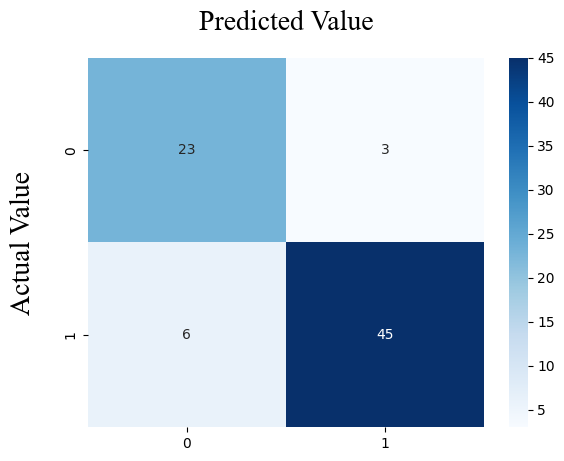

In [415]:
sns.heatmap( conf_mat, annot=True, fmt="d", cmap="Blues" );
plt.title( 'Predicted Value', fontsize = 20, fontfamily = 'Times New Roman', pad=20 );
plt.ylabel( 'Actual Value', fontsize = 20, fontfamily = 'Times New Roman', labelpad=20  );

<hr>


<span style="color: #320BDEFF; font-family: Calibri; font-size: 20px; font-weight: bold;">
    [2] Decision Tree
</span>

In [416]:
dt_model = DecisionTreeClassifier()

In [417]:
dt_model.fit( x_train, y_train )

DecisionTreeClassifier()

In [418]:
y_pred_dt = dt_model.predict( x_test )

In [419]:
# Calculating Training accuracy 

train_acc_dt = round( dt_model.score( x_train, y_train ) * 100, 2 )
print( f'Training Accuracy : {train_acc_dt}%' )

Training Accuracy : 100.0%


In [420]:
test_acc_dt = round( accuracy_score( y_test, y_pred_dt ) * 100, 2 )
print( f'Testing Accuracy : {test_acc_dt}%' )

Testing Accuracy : 97.4%


In [421]:
print( f'Training Accuracy : {train_acc_dt}%' )
print( f'Testing Accuracy : {test_acc_dt}%' )

Training Accuracy : 100.0%
Testing Accuracy : 97.4%


In [422]:
dt_precision = round( precision_score(y_test, y_pred_dt) * 100, 2 )
dt_recall = round( recall_score(y_test, y_pred_dt) * 100, 2 )
dt_f1_score = round( f1_score(y_test, y_pred_dt) * 100, 2 )

print( f'Precision : {dt_precision}%')
print( f'Recall : {dt_recall}%' )
print( f'F1_score : {dt_f1_score}%')

Precision : 98.04%
Recall : 98.04%
F1_score : 98.04%


<hr>

<span style="color: #4169E1; font-family: Calibri; font-size: 40px; font-weight: bold;">
    ⚡ DT Recall > Log_Reg Recall ⚡
</span>

<span style="color: #4169E1; font-family: Calibri; font-size: 30px; font-weight: bold;">
    ⚡ Saving Decision Tree Model ⚡
</span>

In [423]:
import joblib

In [424]:
joblib.dump(dt_model,"ckd_model.pkl")

['ckd_model.pkl']